# NHL Game Prediction

## Table of Contents
- [1.0 - Python Coding Libraries](#10---python-coding-libraries)
- [1.1 - Importing Data](#11---importing-data)
- [1.2 - Data Cleaning](#12---data-cleaning)
- [1.3 - Feature Engineering](#13---feature-engineering)
- [2.0 - Home Team DataFrame](#20---home-team-dataframe)
- [2.1 - Away Team DataFrame](#21---away-team-dataframe)
- [2.2 - Home & Away Joined DataFrame](#22---home--away-joined-dataframe)
- [3.0 - DataFrame for Machine Learning](#30---dataframe-for-machine-learning)
- [3.1 - Logistic Classification](#31---logistic-classification)
- [3.2 - Random Forst](#32---random-forest)

### 1.0 - Python Coding Libraries

In [92]:
# Import libraries
import urllib.request
import json
import pandas as pd
import io
import numpy as np
import pandas as pd
from sklearn import preprocessing
import math
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, SimpleRNN, LSTM
from sklearn.metrics import accuracy_score
np.random.seed(2)
tf.random.set_seed(2)

# Notebook display options
desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns',300)

### 1.1 - Importing Data

In [55]:
# Function to return data from www.moneypuck.com
def api_call(url: str):
    """Returns the result of an API call."""
   
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    headers= {'User-Agent': user_agent,} 

    request = urllib.request.Request(url, None, headers)
    response = urllib.request.urlopen(request)
    data = response.read()
    rawData = pd.read_csv(io.StringIO(data.decode('utf-8')))
    
    return rawData

In [56]:
# Importing the most recent data
url = 'https://moneypuck.com/moneypuck/playerData/careers/gameByGame/all_teams.csv'
rawData = api_call(url)
rawData.head()

team  season name      gameId playerTeam opposingTeam home_or_away  gameDate    position situation  xGoalsPercentage  corsiPercentage  fenwickPercentage  iceTime  xOnGoalFor  xGoalsFor  xReboundsFor  xFreezeFor  xPlayStoppedFor  xPlayContinuedInZoneFor  xPlayContinuedOutsideZoneFor  flurryAdjustedxGoalsFor  \
0  NYR    2008  NYR  2008020001        NYR          T.B         AWAY  20081004  Team Level     other            0.0000           0.0000             0.0000     42.0       0.000      0.000         0.000       0.000            0.000                    0.000                         0.000                    0.000   
1  NYR    2008  NYR  2008020001        NYR          T.B         AWAY  20081004  Team Level       all            0.4596           0.6408             0.6310   3600.0      37.733      2.287         2.842       8.155            1.134                   22.530                        16.054                    2.249   
2  NYR    2008  NYR  2008020001        NYR          T.B         AWAY  20081004  Team Level      5on5            0.4857           0.6429             0.6364   2283.0      24.802      1.693         1.724       5.513            0.739                   14.650                        10.681                    1.656   
3  NYR    2008  NYR  2008020001        NYR          T.B         AWAY  20081004  Team Level      4on5            0.0482           0.0909             0.1000    468.0       0.640      0.034         0.022       0.096            0.021                    0.236                         0.590                    0.034   
4  NYR    2008  NYR  2008020001        NYR          T.B         AWAY  20081004  Team Level      5on4            0.7317           0.9524             0.9444    807.0      12.291      0.559         1.096       2.546            0.374                    7.643                         4.782                    0.559   

   scoreVenueAdjustedxGoalsFor  flurryScoreVenueAdjustedxGoalsFor  shotsOnGoalFor  missedShotsFor  blockedShotAttemptsFor  shotAttemptsFor  goalsFor  reboundsFor  reboundGoalsFor  freezeFor  playStoppedFor  playContinuedInZoneFor  playContinuedOutsideZoneFor  savedShotsOnGoalFor  savedUnblockedShotAttemptsFor  \
0                        0.000                              0.000             0.0             0.0                     0.0              0.0       0.0          0.0              0.0        0.0             0.0                     0.0                          0.0                  0.0                            0.0   
1                        2.396                              2.357            41.0            12.0                    13.0             66.0       2.0          1.0              0.0       14.0             2.0                    18.0                         16.0                 39.0                           51.0   
2                        1.803                              1.764            28.0             7.0                    10.0             45.0       1.0          0.0              0.0       10.0             1.0                    14.0                          9.0                 27.0                           34.0   
3                        0.034                              0.034             1.0             0.0                     0.0              1.0       0.0          0.0              0.0        1.0             0.0                     0.0                          0.0                  1.0                            1.0   
4                        0.559                              0.559            12.0             5.0                     3.0             20.0       1.0          1.0              0.0        3.0             1.0                     4.0                          7.0                 11.0                           16.0   

   penaltiesFor  penalityMinutesFor  faceOffsWonFor  hitsFor  takeawaysFor  giveawaysFor  lowDangerShotsFor  mediumDangerShotsFor  highDangerShotsFor  lowDangerxGoalsFor  mediumDangerxGoalsFor  highDangerxGoalsFor  lowDangerGoalsFor  medi

### 1.2 - Data Cleaning

In [57]:
def team_acronyms(df):
    """Function to fix duplicate acronyms for same team."""

    # Replacing duplicate team name acronyms
    df['opposingTeam'].replace({'S.J': 'SJS'}, inplace = True)
    df['opposingTeam'].replace({'N.J': 'NJD'}, inplace = True)
    df['opposingTeam'].replace({'T.B': 'TBL'}, inplace = True)
    df['opposingTeam'].replace({'L.A': 'LAK'}, inplace = True)
    df['opposingTeam'].replace({'ATL': 'WPG'}, inplace = True)

    df['team'].replace({'S.J': 'SJS'}, inplace = True)
    df['team'].replace({'N.J': 'NJD'}, inplace = True)
    df['team'].replace({'T.B': 'TBL'}, inplace = True)
    df['team'].replace({'L.A': 'LAK'}, inplace = True)
    df['team'].replace({'ATL': 'WPG'}, inplace = True)

    df['name'].replace({'S.J': 'SJS'}, inplace = True)
    df['name'].replace({'N.J': 'NJD'}, inplace = True)
    df['name'].replace({'T.B': 'TBL'}, inplace = True)
    df['name'].replace({'L.A': 'LAK'}, inplace = True)
    df['name'].replace({'ATL': 'WPG'}, inplace = True)

    df['playerTeam'].replace({'S.J': 'SJS'}, inplace = True)
    df['playerTeam'].replace({'N.J': 'NJD'}, inplace = True)
    df['playerTeam'].replace({'T.B': 'TBL'}, inplace = True)
    df['playerTeam'].replace({'L.A': 'LAK'}, inplace = True)
    df['playerTeam'].replace({'ATL': 'WPG'}, inplace = True)
    
    cleanData = df
    
    return cleanData

In [58]:
# Cleaning the rawData
cleanData = team_acronyms(rawData)
cleanData.head()

team  season name      gameId playerTeam opposingTeam home_or_away  gameDate    position situation  xGoalsPercentage  corsiPercentage  fenwickPercentage  iceTime  xOnGoalFor  xGoalsFor  xReboundsFor  xFreezeFor  xPlayStoppedFor  xPlayContinuedInZoneFor  xPlayContinuedOutsideZoneFor  flurryAdjustedxGoalsFor  \
0  NYR    2008  NYR  2008020001        NYR          TBL         AWAY  20081004  Team Level     other            0.0000           0.0000             0.0000     42.0       0.000      0.000         0.000       0.000            0.000                    0.000                         0.000                    0.000   
1  NYR    2008  NYR  2008020001        NYR          TBL         AWAY  20081004  Team Level       all            0.4596           0.6408             0.6310   3600.0      37.733      2.287         2.842       8.155            1.134                   22.530                        16.054                    2.249   
2  NYR    2008  NYR  2008020001        NYR          TBL         AWAY  20081004  Team Level      5on5            0.4857           0.6429             0.6364   2283.0      24.802      1.693         1.724       5.513            0.739                   14.650                        10.681                    1.656   
3  NYR    2008  NYR  2008020001        NYR          TBL         AWAY  20081004  Team Level      4on5            0.0482           0.0909             0.1000    468.0       0.640      0.034         0.022       0.096            0.021                    0.236                         0.590                    0.034   
4  NYR    2008  NYR  2008020001        NYR          TBL         AWAY  20081004  Team Level      5on4            0.7317           0.9524             0.9444    807.0      12.291      0.559         1.096       2.546            0.374                    7.643                         4.782                    0.559   

   scoreVenueAdjustedxGoalsFor  flurryScoreVenueAdjustedxGoalsFor  shotsOnGoalFor  missedShotsFor  blockedShotAttemptsFor  shotAttemptsFor  goalsFor  reboundsFor  reboundGoalsFor  freezeFor  playStoppedFor  playContinuedInZoneFor  playContinuedOutsideZoneFor  savedShotsOnGoalFor  savedUnblockedShotAttemptsFor  \
0                        0.000                              0.000             0.0             0.0                     0.0              0.0       0.0          0.0              0.0        0.0             0.0                     0.0                          0.0                  0.0                            0.0   
1                        2.396                              2.357            41.0            12.0                    13.0             66.0       2.0          1.0              0.0       14.0             2.0                    18.0                         16.0                 39.0                           51.0   
2                        1.803                              1.764            28.0             7.0                    10.0             45.0       1.0          0.0              0.0       10.0             1.0                    14.0                          9.0                 27.0                           34.0   
3                        0.034                              0.034             1.0             0.0                     0.0              1.0       0.0          0.0              0.0        1.0             0.0                     0.0                          0.0                  1.0                            1.0   
4                        0.559                              0.559            12.0             5.0                     3.0             20.0       1.0          1.0              0.0        3.0             1.0                     4.0                          7.0                 11.0                           16.0   

   penaltiesFor  penalityMinutesFor  faceOffsWonFor  hitsFor  takeawaysFor  giveawaysFor  lowDangerShotsFor  mediumDangerShotsFor  highDangerShotsFor  lowDangerxGoalsFor  mediumDangerxGoalsFor  highDangerxGoalsFor  lowDangerGoalsFor  medi

### 1.3 - Feature Engineering

In [59]:
def feat_eng(df):

    # Adding columns
    shootout_game = np.where((df['situation'] == 'all') & (df['goalsFor'] == df['goalsAgainst']), 1, 0)
    df.insert(loc = 6, column = 'Shootout Game', value = shootout_game)

    ot_game = np.where(df['iceTime'] > 3600.0, 1, 0)
    df.insert(loc = 7, column = 'OT Game', value = ot_game)

    win = np.where(df['goalsFor'] > df['goalsAgainst'], 1, 0)
    df.insert(loc = 8, column = 'Win', value = win)

    loss = np.where((df['OT Game'] == 0) & (df['goalsFor'] < df['goalsAgainst']), 1, 0)
    df.insert(loc = 9, column = 'Loss', value = loss)

    # ot_loss = np.where((df['OT Game'] == 1) & (df['goalsFor'] < df['goalsAgainst']), 1, 0)
    # df.insert(loc = 10, column = 'OT Loss', value = ot_loss)

    # Adding date columns
    df['gameDate'] = pd.to_datetime(df['gameDate'],format='%Y%m%d')
    df['year'] = pd.DatetimeIndex(df['gameDate']).year
    df['month'] = pd.DatetimeIndex(df['gameDate']).month
    df['day'] = pd.DatetimeIndex(df['gameDate']).day

    # Adding columns to be numerical
    le = preprocessing.LabelEncoder()
    df['home_or_away#'] = le.fit_transform(df['home_or_away'])
    df['team#'] = le.fit_transform(df['team'])
    df['opposingTeam#'] = le.fit_transform(df['opposingTeam'])

    # Slicing the data
    df = df[df['situation'] == 'all']
    df = df[df['season'] >= 2018]
    df = df[df['playoffGame'] == 0]
    df = df[df['Shootout Game'] == 0]
    df = df[df['OT Game'] == 0]

    return df

In [60]:
# Feature Engineering using the cleanData
df = feat_eng(cleanData)
df = df.sort_values('gameId')
df.head()

team  season name      gameId playerTeam opposingTeam  Shootout Game  OT Game  Win  Loss home_or_away   gameDate    position situation  xGoalsPercentage  corsiPercentage  fenwickPercentage  iceTime  xOnGoalFor  xGoalsFor  xReboundsFor  xFreezeFor  xPlayStoppedFor  xPlayContinuedInZoneFor  \
114821  WSH    2018  WSH  2018020002        WSH          BOS              0        0    1     0         HOME 2018-10-03  Team Level       all            0.7221           0.5470             0.5778   3600.0      38.169      2.773         2.654       8.350            1.113                   20.711   
145166  BOS    2018  BOS  2018020002        BOS          WSH              0        0    0     1         AWAY 2018-10-03  Team Level       all            0.2779           0.4530             0.4222   3600.0      26.435      1.067         1.425       6.707            0.874                   14.755   
139576  CGY    2018  CGY  2018020003        CGY          VAN              0        0    0     1         AWAY 2018-10-03  Team Level       all            0.5016           0.6822             0.6627   3600.0      39.927      3.204         3.095       8.651            1.313                   21.818   
157191  VAN    2018  VAN  2018020003        VAN          CGY              0        0    1     0         HOME 2018-10-03  Team Level       all            0.4984           0.3178             0.3373   3600.0      21.082      3.183         1.705       4.693            0.694                    9.362   
168666  SJS    2018  SJS  2018020004        SJS          ANA              0        0    0     1         HOME 2018-10-03  Team Level       all            0.4955           0.6762             0.7237   3600.0      37.135      2.701         2.510       9.197            1.280                   23.429   

        xPlayContinuedOutsideZoneFor  flurryAdjustedxGoalsFor  scoreVenueAdjustedxGoalsFor  flurryScoreVenueAdjustedxGoalsFor  shotsOnGoalFor  missedShotsFor  blockedShotAttemptsFor  shotAttemptsFor  goalsFor  reboundsFor  reboundGoalsFor  freezeFor  playStoppedFor  playContinuedInZoneFor  \
114821                        16.398                    2.700                        2.803                              2.729            37.0            15.0                    12.0             64.0       7.0          0.0              0.0       11.0             0.0                    17.0   
145166                        13.171                    1.065                        1.051                              1.048            25.0            13.0                    15.0             53.0       0.0          0.0              0.0        6.0             0.0                    13.0   
139576                        16.919                    2.962                        3.192                              2.953            35.0            20.0                    18.0             73.0       2.0          5.0              0.0        5.0             2.0                    17.0   
157191                         8.364                    3.022                        3.193                              3.031            23.0             5.0                     6.0             34.0       5.0          4.0              1.0        7.0             0.0                     4.0   
168666                        15.883                    2.640                        2.554                              2.497            33.0            22.0                    16.0             71.0       2.0          4.0              0.0        7.0             0.0                    23.0   

        playContinuedOutsideZoneFor  savedShotsOnGoalFor  savedUnblockedShotAttemptsFor  penaltiesFor  penalityMinutesFor  faceOffsWonFor  hitsFor  takeawaysFor  giveawaysFor  lowDangerShotsFor  mediumDangerShotsFor  highDangerShotsFor  lowDangerxGoalsFor  mediumDangerxGoalsFor  highDangerxGoalsFor  \
114821                         17.0                 30.0                           45.0           4.0                14.0            19.0     16.0    

### 2.0 - Home Team DataFrame

In [61]:
home_mask = df.home_or_away == 'HOME'
home_df = pd.DataFrame()
home_df = home_df.append(df.loc[home_mask])
home_df.head(10)

team  season name      gameId playerTeam opposingTeam  Shootout Game  OT Game  Win  Loss home_or_away   gameDate    position situation  xGoalsPercentage  corsiPercentage  fenwickPercentage  iceTime  xOnGoalFor  xGoalsFor  xReboundsFor  xFreezeFor  xPlayStoppedFor  xPlayContinuedInZoneFor  \
114821  WSH    2018  WSH  2018020002        WSH          BOS              0        0    1     0         HOME 2018-10-03  Team Level       all            0.7221           0.5470             0.5778   3600.0      38.169      2.773         2.654       8.350            1.113                   20.711   
157191  VAN    2018  VAN  2018020003        VAN          CGY              0        0    1     0         HOME 2018-10-03  Team Level       all            0.4984           0.3178             0.3373   3600.0      21.082      3.183         1.705       4.693            0.694                    9.362   
168666  SJS    2018  SJS  2018020004        SJS          ANA              0        0    0     1         HOME 2018-10-03  Team Level       all            0.4955           0.6762             0.7237   3600.0      37.135      2.701         2.510       9.197            1.280                   23.429   
97591   BUF    2018  BUF  2018020005        BUF          BOS              0        0    0     1         HOME 2018-10-04  Team Level       all            0.3618           0.5794             0.5698   3600.0      34.526      2.388         2.397       8.194            1.093                   21.350   
3931    NYR    2018  NYR  2018020006        NYR          NSH              0        0    0     1         HOME 2018-10-04  Team Level       all            0.6160           0.4874             0.5341   3600.0      34.472      2.984         2.224       7.267            1.042                   18.851   
86131   STL    2018  STL  2018020011        STL          WPG              0        0    0     1         HOME 2018-10-04  Team Level       all            0.6161           0.5847             0.6170   3600.0      39.719      4.040         3.317       8.335            1.252                   24.943   
32336   DAL    2018  DAL  2018020012        DAL          ARI              0        0    1     0         HOME 2018-10-04  Team Level       all            0.5737           0.4857             0.4868   3600.0      27.865      2.578         1.832       6.531            0.854                   14.208   
54551   COL    2018  COL  2018020013        COL          MIN              0        0    1     0         HOME 2018-10-04  Team Level       all            0.7198           0.5702             0.6190   3600.0      35.423      4.293         2.310       7.550            1.102                   19.344   
62576   VGK    2018  VGK  2018020014        VGK          PHI              0        0    0     1         HOME 2018-10-04  Team Level       all            0.6023           0.5591             0.5634   3600.0      30.396      4.694         2.401       6.098            0.943                   14.870   
121936  CBJ    2018  CBJ  2018020015        CBJ          CAR              0        0    0     1         HOME 2018-10-05  Team Level       all            0.5764           0.4737             0.4889   3600.0      30.966      3.529         2.074       7.124            0.953                   16.186   

        xPlayContinuedOutsideZoneFor  flurryAdjustedxGoalsFor  scoreVenueAdjustedxGoalsFor  flurryScoreVenueAdjustedxGoalsFor  shotsOnGoalFor  missedShotsFor  blockedShotAttemptsFor  shotAttemptsFor  goalsFor  reboundsFor  reboundGoalsFor  freezeFor  playStoppedFor  playContinuedInZoneFor  \
114821                        16.398                    2.700                        2.803                              2.729            37.0            15.0                    12.0             64.0       7.0          0.0              0.0       11.0             0.0                    17.0   
157191                         8.364                    3.022                        3.193                              3.031      

### 2.1 - Away Team DataFrame

In [62]:
away_mask = df.home_or_away == 'AWAY'
away_df = pd.DataFrame()
away_df = away_df.append(df.loc[away_mask])
away_df.head(10)

team  season name      gameId playerTeam opposingTeam  Shootout Game  OT Game  Win  Loss home_or_away   gameDate    position situation  xGoalsPercentage  corsiPercentage  fenwickPercentage  iceTime  xOnGoalFor  xGoalsFor  xReboundsFor  xFreezeFor  xPlayStoppedFor  xPlayContinuedInZoneFor  \
145166  BOS    2018  BOS  2018020002        BOS          WSH              0        0    0     1         AWAY 2018-10-03  Team Level       all            0.2779           0.4530             0.4222   3600.0      26.435      1.067         1.425       6.707            0.874                   14.755   
139576  CGY    2018  CGY  2018020003        CGY          VAN              0        0    0     1         AWAY 2018-10-03  Team Level       all            0.5016           0.6822             0.6627   3600.0      39.927      3.204         3.095       8.651            1.313                   21.818   
60256   ANA    2018  ANA  2018020004        ANA          SJS              0        0    1     0         AWAY 2018-10-03  Team Level       all            0.5045           0.3238             0.2763   3600.0      14.199      2.750         0.822       3.219            0.504                    7.808   
145171  BOS    2018  BOS  2018020005        BOS          BUF              0        0    1     0         AWAY 2018-10-04  Team Level       all            0.6382           0.4206             0.4302   3600.0      26.103      4.213         1.492       5.249            0.757                   13.386   
133666  NSH    2018  NSH  2018020006        NSH          NYR              0        0    1     0         AWAY 2018-10-04  Team Level       all            0.3840           0.5126             0.4659   3600.0      29.403      1.860         1.845       7.090            0.898                   16.864   
20871   WPG    2018  WPG  2018020011        WPG          STL              0        0    1     0         AWAY 2018-10-04  Team Level       all            0.3839           0.4153             0.3830   3600.0      25.712      2.517         2.051       5.458            0.803                   14.811   
103561  ARI    2018  ARI  2018020012        ARI          DAL              0        0    0     1         AWAY 2018-10-04  Team Level       all            0.4263           0.5143             0.5132   3600.0      27.353      1.916         1.941       5.949            0.884                   16.237   
48861   MIN    2018  MIN  2018020013        MIN          COL              0        0    0     1         AWAY 2018-10-04  Team Level       all            0.2802           0.4298             0.3810   3600.0      23.638      1.671         1.899       5.712            0.799                   13.250   
26491   PHI    2018  PHI  2018020014        PHI          VGK              0        0    1     0         AWAY 2018-10-04  Team Level       all            0.3977           0.4409             0.4366   3600.0      22.810      3.099         1.797       4.399            0.661                   11.982   
163001  CAR    2018  CAR  2018020015        CAR          CBJ              0        0    1     0         AWAY 2018-10-05  Team Level       all            0.4236           0.5263             0.5111   3600.0      32.192      2.594         2.238       7.443            1.010                   17.890   

        xPlayContinuedOutsideZoneFor  flurryAdjustedxGoalsFor  scoreVenueAdjustedxGoalsFor  flurryScoreVenueAdjustedxGoalsFor  shotsOnGoalFor  missedShotsFor  blockedShotAttemptsFor  shotAttemptsFor  goalsFor  reboundsFor  reboundGoalsFor  freezeFor  playStoppedFor  playContinuedInZoneFor  \
145166                        13.171                    1.065                        1.051                              1.048            25.0            13.0                    15.0             53.0       0.0          0.0              0.0        6.0             0.0                    13.0   
139576                        16.919                    2.962                        3.192                              2.953      

### 2.2 - Home & Away Joined DataFrame

In [63]:
# Join the two dataset together
master = (pd.merge(home_df, away_df, on= 'gameId'))
master.head()

team_x  season_x name_x      gameId playerTeam_x opposingTeam_x  Shootout Game_x  OT Game_x  Win_x  Loss_x home_or_away_x gameDate_x  position_x situation_x  xGoalsPercentage_x  corsiPercentage_x  fenwickPercentage_x  iceTime_x  xOnGoalFor_x  xGoalsFor_x  xReboundsFor_x  xFreezeFor_x  xPlayStoppedFor_x  \
0    WSH      2018    WSH  2018020002          WSH            BOS                0          0      1       0           HOME 2018-10-03  Team Level         all              0.7221             0.5470               0.5778     3600.0        38.169        2.773           2.654         8.350              1.113   
1    VAN      2018    VAN  2018020003          VAN            CGY                0          0      1       0           HOME 2018-10-03  Team Level         all              0.4984             0.3178               0.3373     3600.0        21.082        3.183           1.705         4.693              0.694   
2    SJS      2018    SJS  2018020004          SJS            ANA                0          0      0       1           HOME 2018-10-03  Team Level         all              0.4955             0.6762               0.7237     3600.0        37.135        2.701           2.510         9.197              1.280   
3    BUF      2018    BUF  2018020005          BUF            BOS                0          0      0       1           HOME 2018-10-04  Team Level         all              0.3618             0.5794               0.5698     3600.0        34.526        2.388           2.397         8.194              1.093   
4    NYR      2018    NYR  2018020006          NYR            NSH                0          0      0       1           HOME 2018-10-04  Team Level         all              0.6160             0.4874               0.5341     3600.0        34.472        2.984           2.224         7.267              1.042   

   xPlayContinuedInZoneFor_x  xPlayContinuedOutsideZoneFor_x  flurryAdjustedxGoalsFor_x  scoreVenueAdjustedxGoalsFor_x  flurryScoreVenueAdjustedxGoalsFor_x  shotsOnGoalFor_x  missedShotsFor_x  blockedShotAttemptsFor_x  shotAttemptsFor_x  goalsFor_x  reboundsFor_x  reboundGoalsFor_x  freezeFor_x  playStoppedFor_x  \
0                     20.711                          16.398                      2.700                          2.803                                2.729              37.0              15.0                      12.0               64.0         7.0            0.0                0.0         11.0               0.0   
1                      9.362                           8.364                      3.022                          3.193                                3.031              23.0               5.0                       6.0               34.0         5.0            4.0                1.0          7.0               0.0   
2                     23.429                          15.883                      2.640                          2.554                                2.497              33.0              22.0                      16.0               71.0         2.0            4.0                0.0          7.0               0.0   
3                     21.350                          13.577                      2.209                          2.203                                2.032              32.0              17.0                      13.0               62.0         0.0            2.0                0.0         10.0               3.0   
4                     18.851                          14.633                      2.948                          2.852                                2.818              36.0              11.0                      11.0               58.0         2.0            2.0                1.0          5.0               1.0   

   playContinuedInZoneFor_x  playContinuedOutsideZoneFor_x  savedShotsOnGoalFor_x  savedUnblockedShotAttemptsFor_x  penaltiesFor_x  penalityMinutesFor_x  faceOffsWonFor_x  hitsFor_x  takeawaysFor_x  giveawaysFor_x  lowDangerShotsFor_x  mediumDa

In [64]:
# Categorical columns to be one-hot encoded
categorical_cols = ['team_x', 'opposingTeam_x'] 

#One-hot encode
master = pd.get_dummies(master, columns = categorical_cols)
master.head()

season_x name_x      gameId playerTeam_x  Shootout Game_x  OT Game_x  Win_x  Loss_x home_or_away_x gameDate_x  position_x situation_x  xGoalsPercentage_x  corsiPercentage_x  fenwickPercentage_x  iceTime_x  xOnGoalFor_x  xGoalsFor_x  xReboundsFor_x  xFreezeFor_x  xPlayStoppedFor_x  xPlayContinuedInZoneFor_x  \
0      2018    WSH  2018020002          WSH                0          0      1       0           HOME 2018-10-03  Team Level         all              0.7221             0.5470               0.5778     3600.0        38.169        2.773           2.654         8.350              1.113                     20.711   
1      2018    VAN  2018020003          VAN                0          0      1       0           HOME 2018-10-03  Team Level         all              0.4984             0.3178               0.3373     3600.0        21.082        3.183           1.705         4.693              0.694                      9.362   
2      2018    SJS  2018020004          SJS                0          0      0       1           HOME 2018-10-03  Team Level         all              0.4955             0.6762               0.7237     3600.0        37.135        2.701           2.510         9.197              1.280                     23.429   
3      2018    BUF  2018020005          BUF                0          0      0       1           HOME 2018-10-04  Team Level         all              0.3618             0.5794               0.5698     3600.0        34.526        2.388           2.397         8.194              1.093                     21.350   
4      2018    NYR  2018020006          NYR                0          0      0       1           HOME 2018-10-04  Team Level         all              0.6160             0.4874               0.5341     3600.0        34.472        2.984           2.224         7.267              1.042                     18.851   

   xPlayContinuedOutsideZoneFor_x  flurryAdjustedxGoalsFor_x  scoreVenueAdjustedxGoalsFor_x  flurryScoreVenueAdjustedxGoalsFor_x  shotsOnGoalFor_x  missedShotsFor_x  blockedShotAttemptsFor_x  shotAttemptsFor_x  goalsFor_x  reboundsFor_x  reboundGoalsFor_x  freezeFor_x  playStoppedFor_x  playContinuedInZoneFor_x  \
0                          16.398                      2.700                          2.803                                2.729              37.0              15.0                      12.0               64.0         7.0            0.0                0.0         11.0               0.0                      17.0   
1                           8.364                      3.022                          3.193                                3.031              23.0               5.0                       6.0               34.0         5.0            4.0                1.0          7.0               0.0                       4.0   
2                          15.883                      2.640                          2.554                                2.497              33.0              22.0                      16.0               71.0         2.0            4.0                0.0          7.0               0.0                      23.0   
3                          13.577                      2.209                          2.203                                2.032              32.0              17.0                      13.0               62.0         0.0            2.0                0.0         10.0               3.0                      17.0   
4                          14.633                      2.948                          2.852                                2.818              36.0              11.0                      11.0               58.0         2.0            2.0                1.0          5.0               1.0                      22.0   

   playContinuedOutsideZoneFor_x  savedShotsOnGoalFor_x  savedUnblockedShotAttemptsFor_x  penaltiesFor_x  penalityMinutesFor_x  faceOffsWonFor_x  hitsFor_x  takeawaysFor_x  giveawaysFor_x  lowDangerShotsFor_x  mediumDange

### 3.0 - DataFrame for Machine Learning

In [95]:
final = master[['team_x_ANA', 'team_x_ARI', 'team_x_BOS', 'team_x_BUF', 'team_x_CAR', 'team_x_CBJ', 'team_x_CGY', 'team_x_CHI',
                'team_x_COL', 'team_x_DAL', 'team_x_DET', 'team_x_EDM', 'team_x_FLA', 'team_x_LAK', 'team_x_MIN', 'team_x_MTL',
                'team_x_NJD', 'team_x_NSH', 'team_x_NYI', 'team_x_NYR', 'team_x_OTT', 'team_x_PHI', 'team_x_PIT', 'team_x_SEA', 
                'team_x_SJS', 'team_x_STL', 'team_x_TBL', 'team_x_TOR', 'team_x_VAN', 'team_x_VGK', 'team_x_WPG', 'team_x_WSH',
                'opposingTeam_x_ANA', 'opposingTeam_x_ARI', 'opposingTeam_x_BOS', 'opposingTeam_x_BUF', 'opposingTeam_x_CAR',
                'opposingTeam_x_CBJ', 'opposingTeam_x_CGY', 'opposingTeam_x_CHI', 'opposingTeam_x_COL', 'opposingTeam_x_DAL',
                'opposingTeam_x_DET', 'opposingTeam_x_EDM', 'opposingTeam_x_FLA', 'opposingTeam_x_LAK', 'opposingTeam_x_MIN',
                'opposingTeam_x_MTL', 'opposingTeam_x_NJD', 'opposingTeam_x_NSH', 'opposingTeam_x_NYI', 'opposingTeam_x_NYR',
                'opposingTeam_x_OTT', 'opposingTeam_x_PHI', 'opposingTeam_x_PIT', 'opposingTeam_x_SEA', 'opposingTeam_x_SJS',
                'opposingTeam_x_STL', 'opposingTeam_x_TBL', 'opposingTeam_x_TOR', 'opposingTeam_x_VAN', 'opposingTeam_x_VGK',
                'opposingTeam_x_WPG', 'opposingTeam_x_WSH',
                'Win_x', 'corsiPercentage_x', 'corsiPercentage_y', 'fenwickPercentage_x', 'fenwickPercentage_y',
                'home_or_away#_x', 'home_or_away#_y']].copy()
final.head()

team_x_ANA  team_x_ARI  team_x_BOS  team_x_BUF  team_x_CAR  team_x_CBJ  team_x_CGY  team_x_CHI  team_x_COL  team_x_DAL  team_x_DET  team_x_EDM  team_x_FLA  team_x_LAK  team_x_MIN  team_x_MTL  team_x_NJD  team_x_NSH  team_x_NYI  team_x_NYR  team_x_OTT  team_x_PHI  team_x_PIT  team_x_SEA  team_x_SJS  team_x_STL  \
0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0   
1           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0   
2           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0   
3           0           0           0           1           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0   
4           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0           0   

   team_x_TBL  team_x_TOR  team_x_VAN  team_x_VGK  team_x_WPG  team_x_WSH  opposingTeam_x_ANA  opposingTeam_x_ARI  opposingTeam_x_BOS  opposingTeam_x_BUF  opposingTeam_x_CAR  opposingTeam_x_CBJ  opposingTeam_x_CGY  opposingTeam_x_CHI  opposingTeam_x_COL  opposingTeam_x_DAL  opposingTeam_x_DET  opposingTeam_x_EDM  \
0           0           0           0           0           0           1                   0                   0                   1                   0                   0                   0                   0                   0                   0                   0                   0                   0   
1           0           0           1           0           0           0                   0                   0                   0                   0                   0                   0                   1                   0                   0                   0                   0                   0   
2           0           0           0           0           0           0                   1                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0   
3           0           0           0           0           0           0                   0                   0                   1                   0                   0                   0                   0                   0                   0                   0                   0                   0   
4           0           0           0           0           0           0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0   

   opposingTeam_x_FLA  opposingTeam_x_LAK  opposingTeam_x_MIN  opposingTeam_x_MTL  opposingTeam_x_NJD  opposingTeam_x_NSH  opposingTeam_x_NYI  opposingTeam_x_NYR  opposingTeam_x_OTT  opposingTeam_x

In [96]:
# Shape of the DataFrame
final.shape

(3646, 71)

In [97]:
# Separate features and labels for models
features = final.drop(labels = "Win_x", axis = 1)
labels = final["Win_x"]

In [98]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 10)

In [99]:
# Normalize
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

final.iloc[:, 65:] = scalar.fit_transform(final.iloc[:, 65:].to_numpy())

In [71]:
final.head()

team_x_ANA  team_x_ARI  team_x_BOS  team_x_BUF  team_x_CAR  team_x_CBJ  team_x_CGY  team_x_CHI  team_x_COL  team_x_DAL  team_x_DET  team_x_EDM  team_x_FLA  team_x_LAK  team_x_MIN  team_x_MTL  team_x_NJD  team_x_NSH  team_x_NYI  team_x_NYR  team_x_OTT  team_x_PHI  team_x_PIT  team_x_SEA  team_x_SJS  team_x_STL  \
0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0   
1           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0   
2           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0   
3           0           0           0           1           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0   
4           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0           0   

   team_x_TBL  team_x_TOR  team_x_VAN  team_x_VGK  team_x_WPG  team_x_WSH  opposingTeam_x_ANA  opposingTeam_x_ARI  opposingTeam_x_BOS  opposingTeam_x_BUF  opposingTeam_x_CAR  opposingTeam_x_CBJ  opposingTeam_x_CGY  opposingTeam_x_CHI  opposingTeam_x_COL  opposingTeam_x_DAL  opposingTeam_x_DET  opposingTeam_x_EDM  \
0           0           0           0           0           0           1                   0                   0                   1                   0                   0                   0                   0                   0                   0                   0                   0                   0   
1           0           0           1           0           0           0                   0                   0                   0                   0                   0                   0                   1                   0                   0                   0                   0                   0   
2           0           0           0           0           0           0                   1                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0   
3           0           0           0           0           0           0                   0                   0                   1                   0                   0                   0                   0                   0                   0                   0                   0                   0   
4           0           0           0           0           0           0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0   

   opposingTeam_x_FLA  opposingTeam_x_LAK  opposingTeam_x_MIN  opposingTeam_x_MTL  opposingTeam_x_NJD  opposingTeam_x_NSH  opposingTeam_x_NYI  opposingTeam_x_NYR  opposingTeam_x_OTT  opposingTeam_x

### 3.1 - Logistic Classification

In [77]:
# Train a LinearRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lm = LogisticRegression(random_state = 100, max_iter= 1000, solver = 'liblinear')
#lm.fit(X_train.values,y_train)
lm.fit(X_train, y_train)
print("** Logistic Regression model has been trained.")
    
# Get the train and test accuracy scores
print(f"** Training Score: {lm.score(X_train, y_train)}")
print(f"** Testing Score: {lm.score(X_test, y_test)}")

# Get the train and test logloss results
print(f"** Training LogLoss: {log_loss(y_train, lm.predict_proba(X_train))}")
print(f"** Testing LogLoss: {log_loss(y_test, lm.predict_proba(X_test))}")

** Logistic Regression model has been trained.
** Training Score: 0.6814128943758574
** Testing Score: 0.6452054794520548
** Training LogLoss: 0.5995048617220583
** Testing LogLoss: 0.626446284069442


### 3.2 - Random Forest

In [78]:
# Import libraries 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initializing a DataFrame to save each model results
rf_results = pd.DataFrame()

# Loop to use different parameters in the model
for f in np.arange(2,68,2):
    for e in np.arange(10,200,20):
        # Create Random Forest model
        clf = RandomForestClassifier(max_features = f,
                                    random_state = 0,
                                    n_estimators = e)
        
        # Fit and train the model using the training data
        clf.fit(X_train, y_train.values.ravel())
        
        # Scoring the models results
        #cScore = clf2.score(df_test_att, df_test_label)
        
        # Score the model based on 'cv' folds
        clfScores = cross_val_score(clf, X_train, y_train.values.ravel(), cv = 5)
        
        # Print average scores and +/- two standard deviations away (covering 95% of scores)
        print("max_features: %i, num_estimators: %i, Accuracy: %0.3f (+/- %0.3f)" % (f, e, clfScores.mean(), clfScores.std() * 2))
        
        # New row for results dataframe containing model hyperparameters and results
        new_row = {'max_features': f,
                   'num_estimators': e,
                   'accuracy': clfScores.mean()}
        rf_results = rf_results.append(new_row, ignore_index = True)

max_features: 2, num_estimators: 10, Accuracy: 0.572 (+/- 0.029)
max_features: 2, num_estimators: 30, Accuracy: 0.596 (+/- 0.031)
max_features: 2, num_estimators: 50, Accuracy: 0.596 (+/- 0.038)
max_features: 2, num_estimators: 70, Accuracy: 0.597 (+/- 0.031)
max_features: 2, num_estimators: 90, Accuracy: 0.602 (+/- 0.034)
max_features: 2, num_estimators: 110, Accuracy: 0.602 (+/- 0.017)
max_features: 2, num_estimators: 130, Accuracy: 0.602 (+/- 0.031)
max_features: 2, num_estimators: 150, Accuracy: 0.601 (+/- 0.031)
max_features: 2, num_estimators: 170, Accuracy: 0.605 (+/- 0.031)
max_features: 2, num_estimators: 190, Accuracy: 0.605 (+/- 0.027)
max_features: 4, num_estimators: 10, Accuracy: 0.583 (+/- 0.026)
max_features: 4, num_estimators: 30, Accuracy: 0.600 (+/- 0.033)
max_features: 4, num_estimators: 50, Accuracy: 0.609 (+/- 0.037)
max_features: 4, num_estimators: 70, Accuracy: 0.608 (+/- 0.032)
max_features: 4, num_estimators: 90, Accuracy: 0.610 (+/- 0.037)
max_features: 4, num

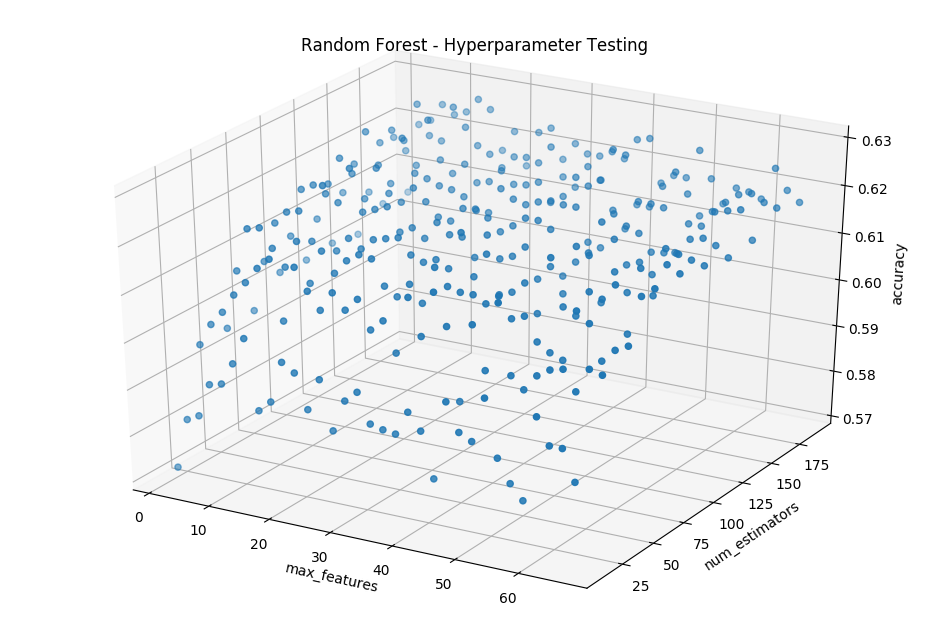

In [81]:
import re
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Data for a three-dimensional scattered points
x = rf_results['max_features'].tolist()
y = rf_results['num_estimators'].tolist()     # test removing .tolist() on all three lines
z = rf_results['accuracy'].tolist()

# Creating figure
fig = plt.figure(figsize= (12,8))
ax = plt.axes(projection = "3d")

# Creating plot
ax.scatter3D(x, y, z, cmap = 'Greens')
plt.title("Random Forest - Hyperparameter Testing")
ax.set_xlabel('max_features')
ax.set_ylabel('num_estimators')
ax.set_zlabel('accuracy')

#Show the plot
plt.show()

In [82]:
# Sort results DataFrame
rf_results.sort_values(by = 'accuracy', ascending = False)

accuracy  max_features  num_estimators
68   0.628247          14.0           170.0
67   0.628245          14.0           150.0
38   0.627570           8.0           170.0
36   0.627224           8.0           130.0
69   0.627215          14.0           190.0
..        ...           ...             ...
270  0.584006          56.0            10.0
10   0.583338           4.0            10.0
210  0.581633          44.0            10.0
280  0.580941          58.0            10.0
0    0.572367           2.0            10.0

[330 rows x 3 columns]

### 3.3 - Neural Networks

In [100]:
def select_optimizer(optimize, learn):
    """Used to select an optimizer and learning rate. """
    
    optimizer_dict = {'Adam': tf.optimizers.Adam(learning_rate = learn),
                      'SGD': tf.optimizers.SGD(learning_rate = learn),
                      'Adadelta': tf.optimizers.Adadelta(learning_rate = learn),
                      'RMSprop': tf.optimizers.RMSprop(learning_rate = learn),
                      'Adagrad': tf.optimizers.Adagrad(learning_rate = learn),
                      'Adamax': tf.optimizers.Adamax(learning_rate = learn),
                      'Nadam': tf.optimizers.Nadam(learning_rate = learn),
                      'Ftrl': tf.optimizers.Ftrl(learning_rate = learn),
                      }
    x = optimizer_dict[optimize]
    return x

In [101]:
# Define function to get model performance (RMSE)
def get_rmse(model_obj):
    """Function to return RMSE of a model."""

    score_train = model_obj.evaluate(X_train, y_train, verbose=0)
    print('Train RMSE: %.2f RMSE' % (math.sqrt(score_train[0])))

    score_test = model_obj.evaluate(X_test, y_test, verbose=0)
    print('Test RMSE: %.2f RMSE' % (math.sqrt(score_test[0])))

In [102]:
# Finding the shape for input_dim
print(f"The shape of the dataset: {X_train.shape}")
dims = X_train.shape[1]
print(f'Dimensions:{dims}')

The shape of the dataset: (2916, 70)
Dimensions:70


2916/2916 [==============================] - 0s 20us/sample - loss: 0.5827 - accuracy: 0.6907


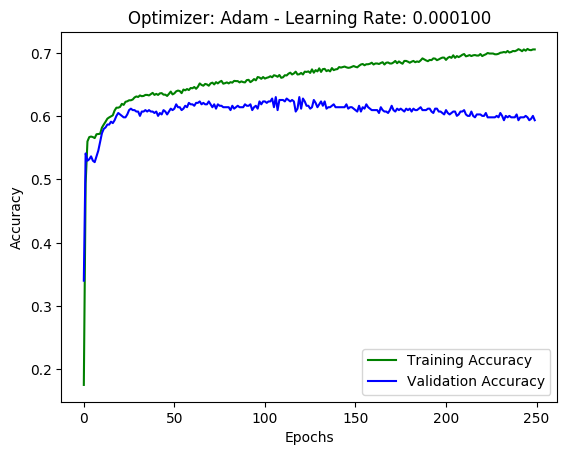

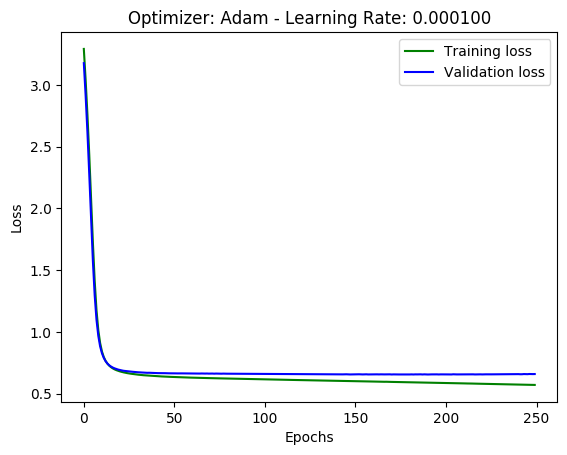

The training accuracyis: 0.6906721591949463
The training loss is: 0.5826798557254022
The test sccuracy is: 0.6136986301369863
Train RMSE: 0.76 RMSE
Test RMSE: 0.81 RMSE

2916/2916 [==============================] - 0s 27us/sample - loss: 0.4561 - accuracy: 0.7898


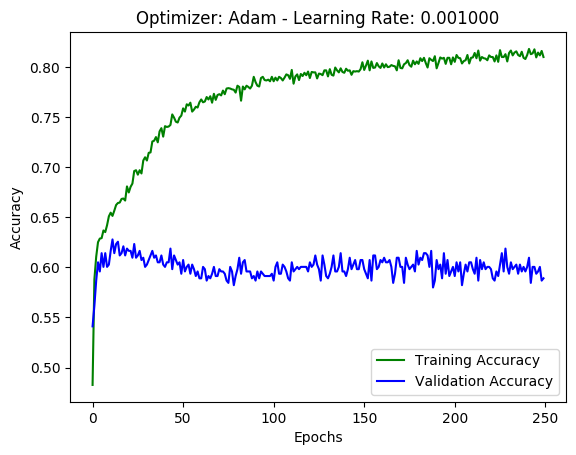

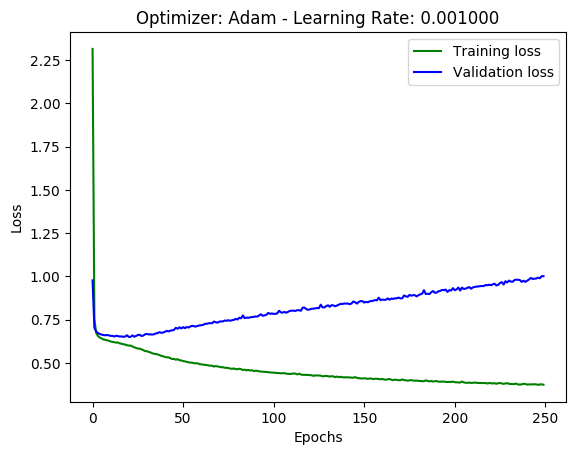

The training accuracyis: 0.7897804975509644
The training loss is: 0.45614434331042286
The test sccuracy is: 0.6136986301369863
Train RMSE: 0.68 RMSE
Test RMSE: 0.98 RMSE

2916/2916 [==============================] - 0s 20us/sample - loss: 0.5423 - accuracy: 0.8368


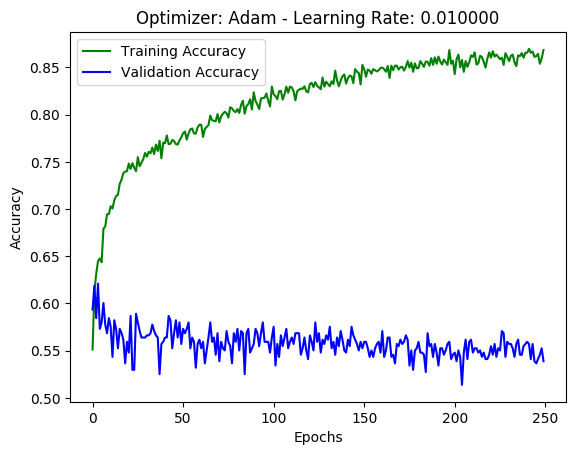

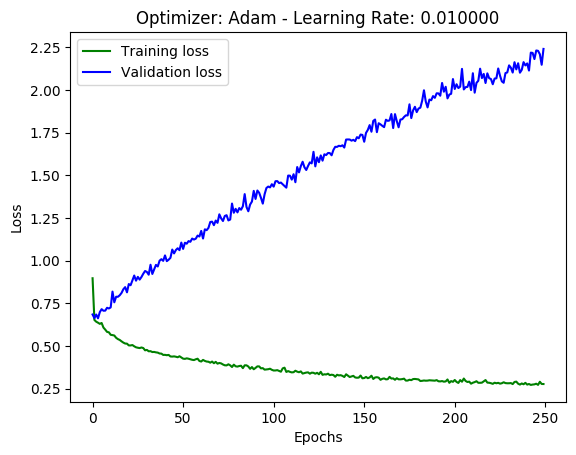

The training accuracyis: 0.8367626667022705
The training loss is: 0.5423026758620442
The test sccuracy is: 0.5753424657534246
Train RMSE: 0.74 RMSE
Test RMSE: 1.35 RMSE

2916/2916 [==============================] - 0s 22us/sample - loss: 0.9609 - accuracy: 0.6866


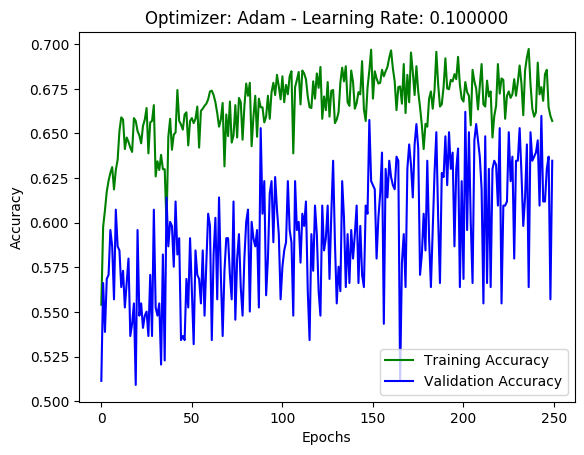

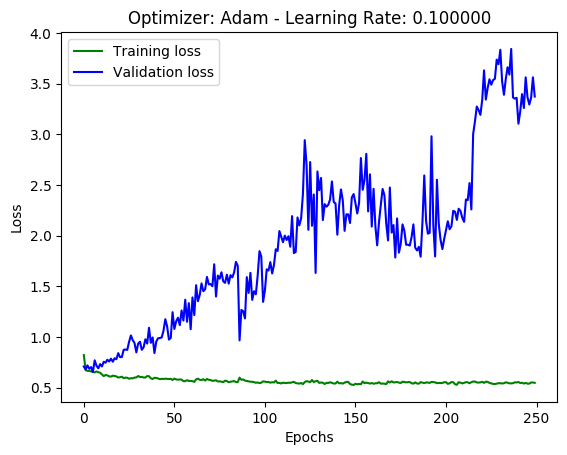

The training accuracyis: 0.6865569353103638
The training loss is: 0.96090865511299
The test sccuracy is: 0.6095890410958904
Train RMSE: 0.98 RMSE
Test RMSE: 1.77 RMSE

2916/2916 [==============================] - 0s 20us/sample - loss: 0.7069 - accuracy: 0.4431


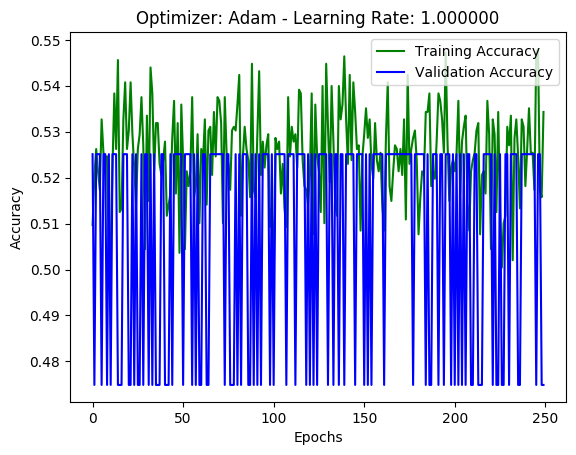

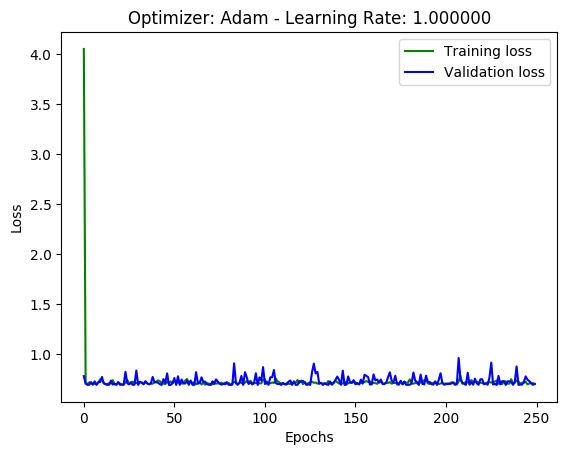

The training accuracyis: 0.44307270646095276
The training loss is: 0.7069277835317437
The test sccuracy is: 0.4726027397260274
Train RMSE: 0.84 RMSE
Test RMSE: 0.84 RMSE

2916/2916 [==============================] - 0s 21us/sample - loss: 0.8700 - accuracy: 0.5576


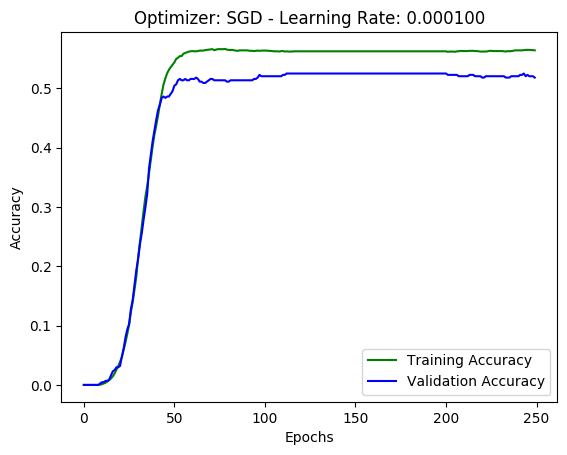

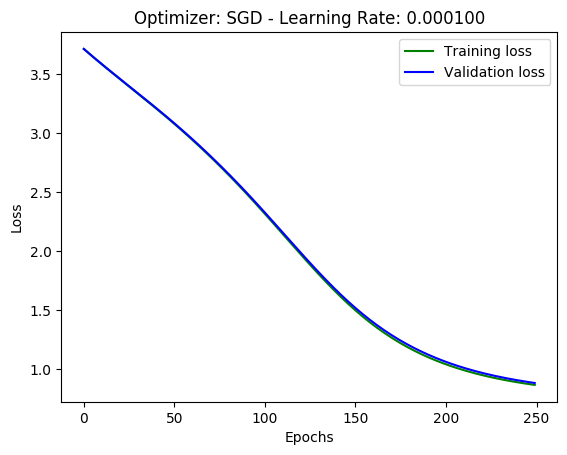

The training accuracyis: 0.5576131939888
The training loss is: 0.8699856383319745
The test sccuracy is: 0.5260273972602739
Train RMSE: 0.93 RMSE
Test RMSE: 0.94 RMSE

2916/2916 [==============================] - 0s 21us/sample - loss: 0.6662 - accuracy: 0.5974


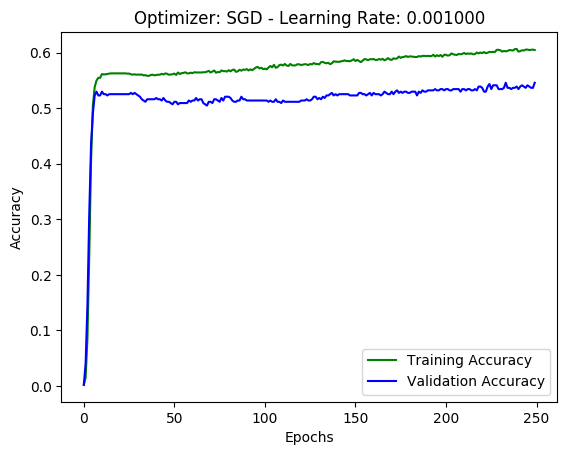

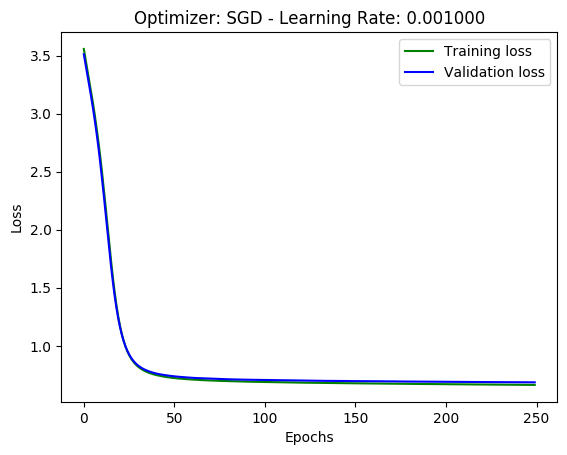

The training accuracyis: 0.5973936915397644
The training loss is: 0.6662057052750974
The test sccuracy is: 0.5671232876712329
Train RMSE: 0.82 RMSE
Test RMSE: 0.82 RMSE

2916/2916 [==============================] - 0s 16us/sample - loss: 0.6050 - accuracy: 0.6725


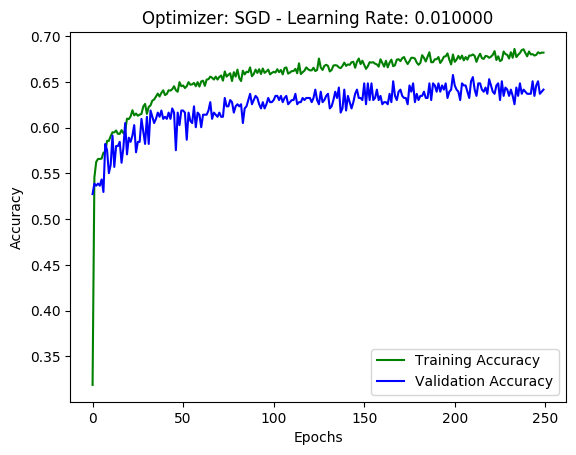

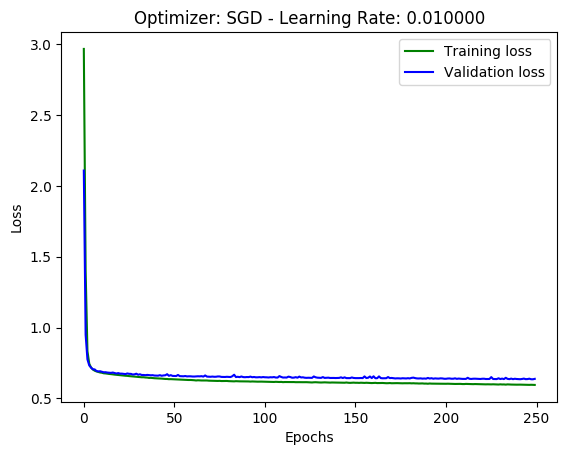

The training accuracyis: 0.6724965572357178
The training loss is: 0.6050046134142228
The test sccuracy is: 0.6315068493150685
Train RMSE: 0.78 RMSE
Test RMSE: 0.80 RMSE

2916/2916 [==============================] - 0s 17us/sample - loss: 0.6248 - accuracy: 0.7044


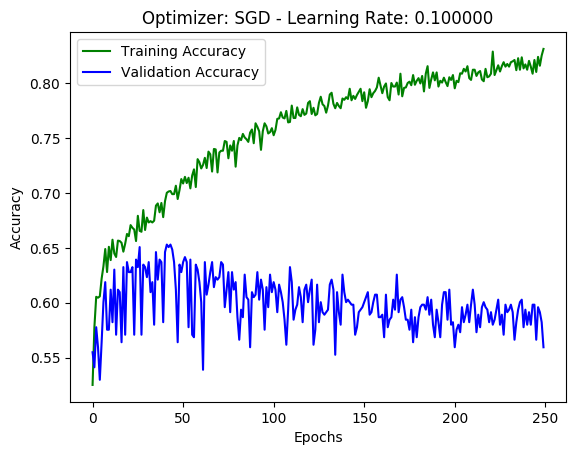

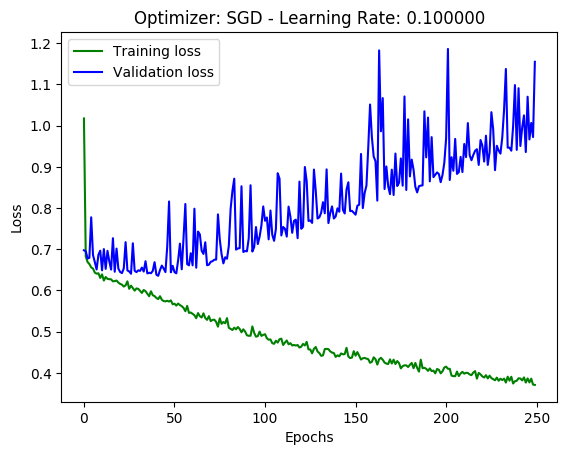

The training accuracyis: 0.7043895721435547
The training loss is: 0.6248305485735869
The test sccuracy is: 0.5684931506849316
Train RMSE: 0.79 RMSE
Test RMSE: 1.04 RMSE

2916/2916 [==============================] - 0s 19us/sample - loss: 0.5503 - accuracy: 0.8203


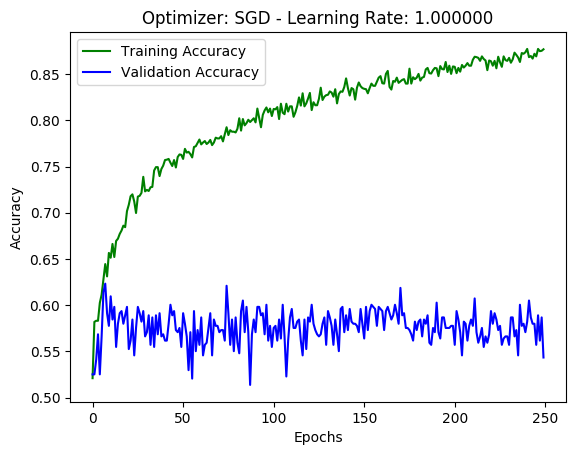

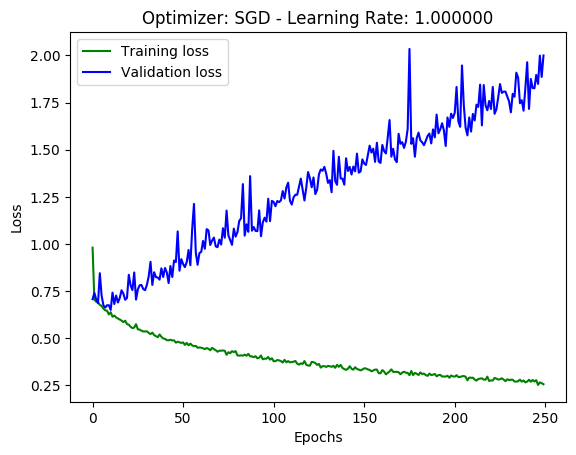

The training accuracyis: 0.8203017711639404
The training loss is: 0.5503193780227944
The test sccuracy is: 0.5739726027397261
Train RMSE: 0.74 RMSE
Test RMSE: 1.32 RMSE

2916/2916 [==============================] - 0s 18us/sample - loss: 3.2894 - accuracy: 0.1481


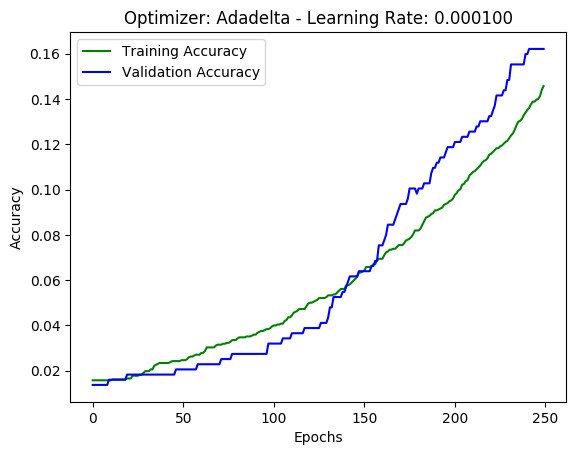

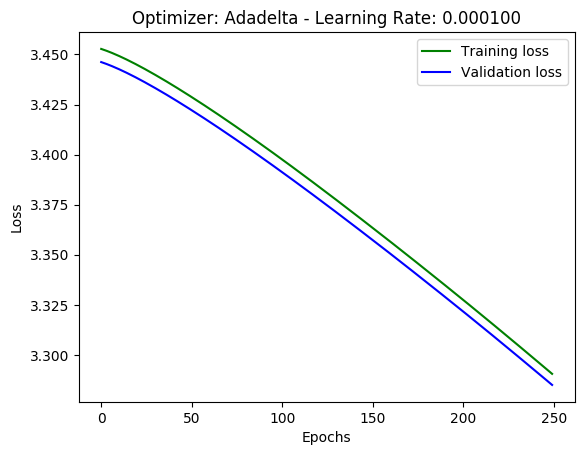

The training accuracyis: 0.14814814925193787
The training loss is: 3.2893824773560825
The test sccuracy is: 0.16575342465753426
Train RMSE: 1.81 RMSE
Test RMSE: 1.81 RMSE

2916/2916 [==============================] - 0s 15us/sample - loss: 1.2104 - accuracy: 0.5569


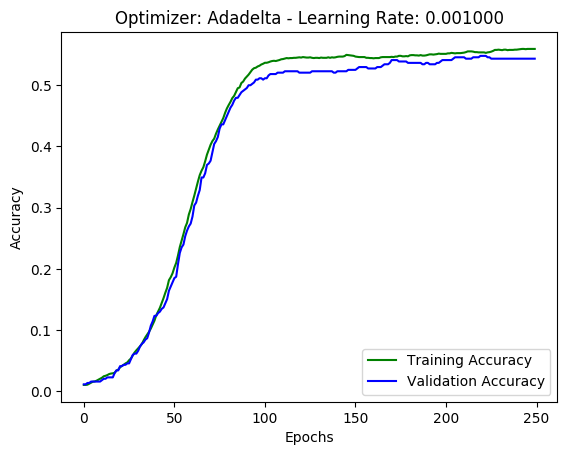

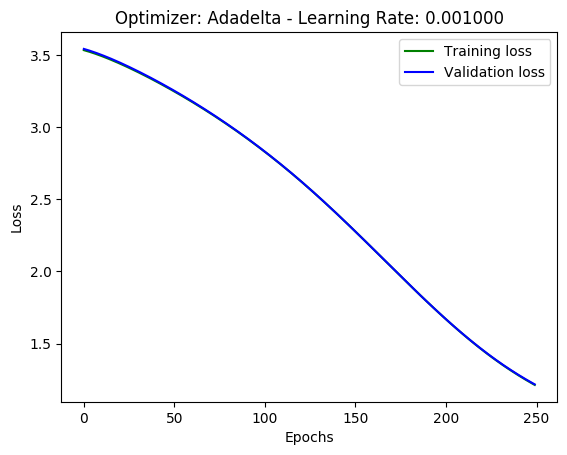

The training accuracyis: 0.5569273233413696
The training loss is: 1.2104091040882063
The test sccuracy is: 0.5150684931506849
Train RMSE: 1.10 RMSE
Test RMSE: 1.11 RMSE

2916/2916 [==============================] - 0s 15us/sample - loss: 0.6530 - accuracy: 0.6238


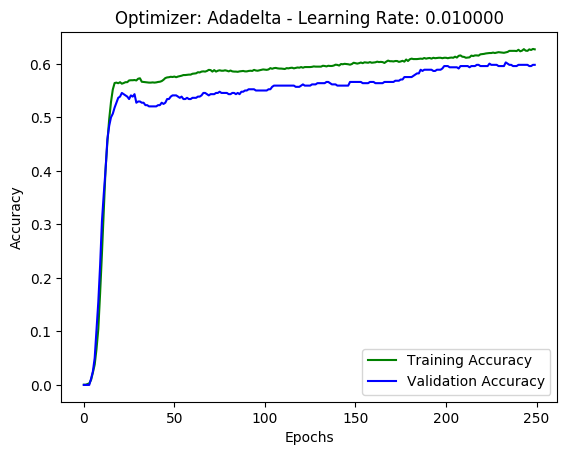

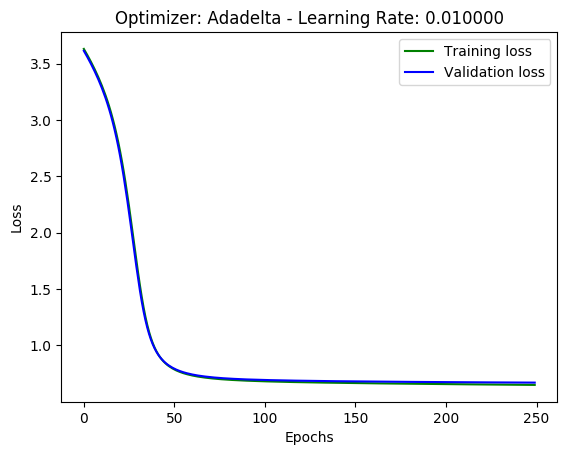

The training accuracyis: 0.623799741268158
The training loss is: 0.6529919386564131
The test sccuracy is: 0.5534246575342465
Train RMSE: 0.81 RMSE
Test RMSE: 0.83 RMSE

2916/2916 [==============================] - 0s 15us/sample - loss: 0.5939 - accuracy: 0.6804


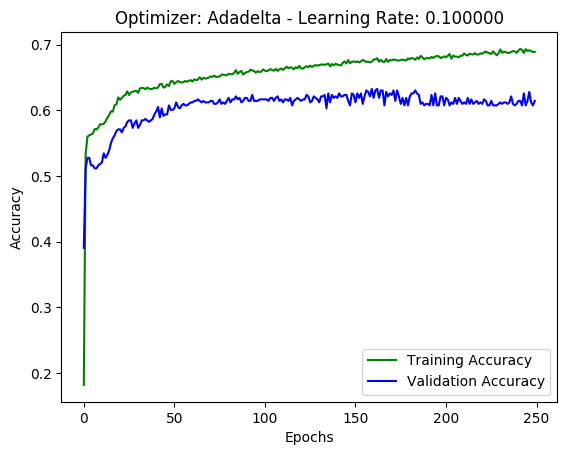

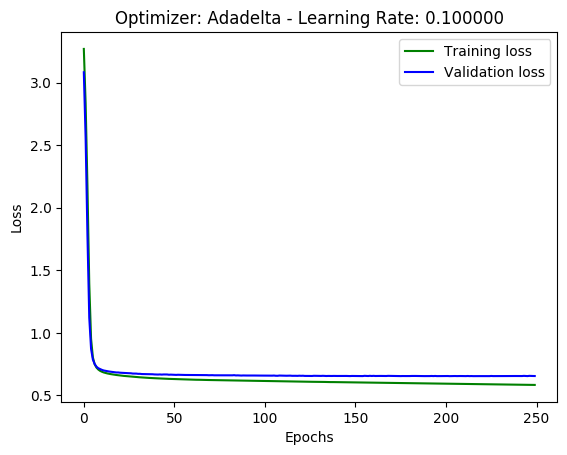

The training accuracyis: 0.68038409948349
The training loss is: 0.5939165745415969
The test sccuracy is: 0.6
Train RMSE: 0.77 RMSE
Test RMSE: 0.81 RMSE

2916/2916 [==============================] - 0s 15us/sample - loss: 0.4903 - accuracy: 0.7647


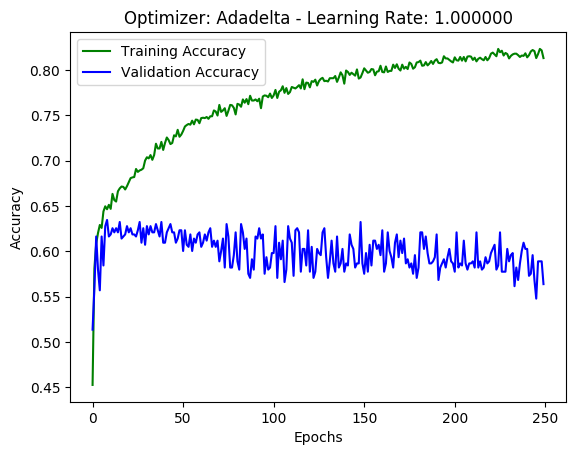

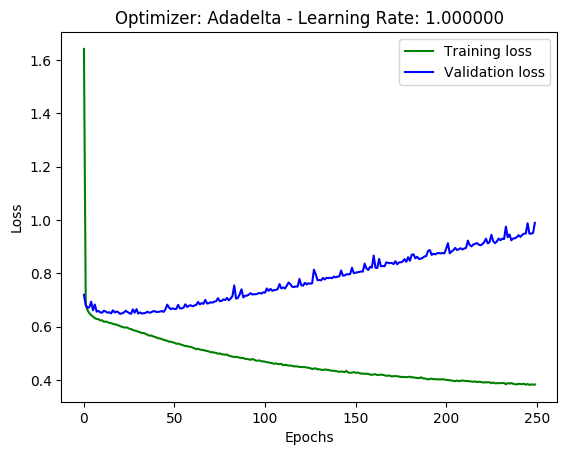

The training accuracyis: 0.7647462487220764
The training loss is: 0.49031871266979904
The test sccuracy is: 0.6150684931506849
Train RMSE: 0.70 RMSE
Test RMSE: 0.95 RMSE

2916/2916 [==============================] - 0s 15us/sample - loss: 0.6026 - accuracy: 0.6715


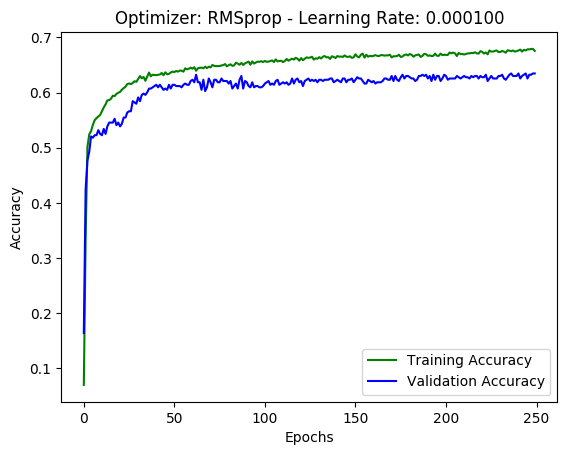

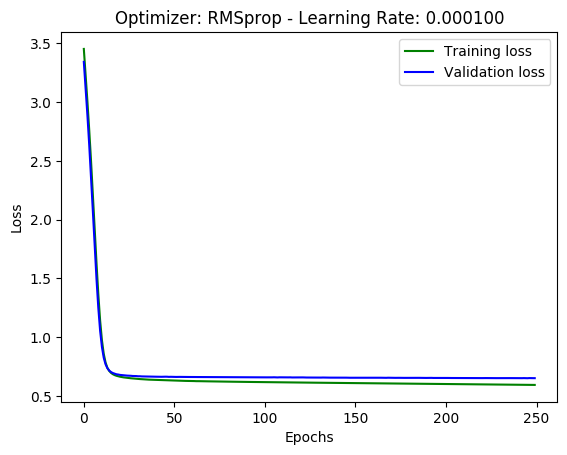

The training accuracyis: 0.6714677810668945
The training loss is: 0.6025597925702895
The test sccuracy is: 0.6219178082191781
Train RMSE: 0.78 RMSE
Test RMSE: 0.81 RMSE

2916/2916 [==============================] - 0s 15us/sample - loss: 0.4703 - accuracy: 0.7836


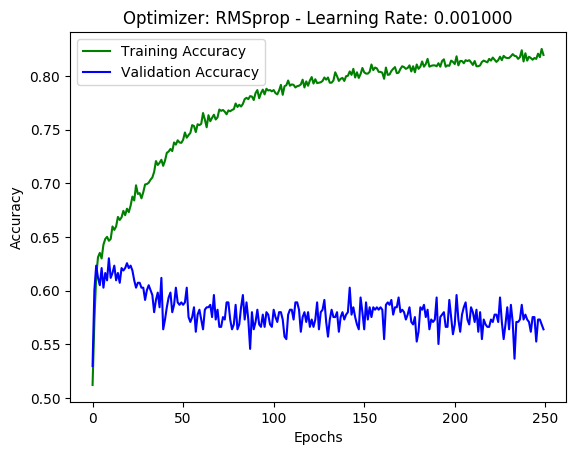

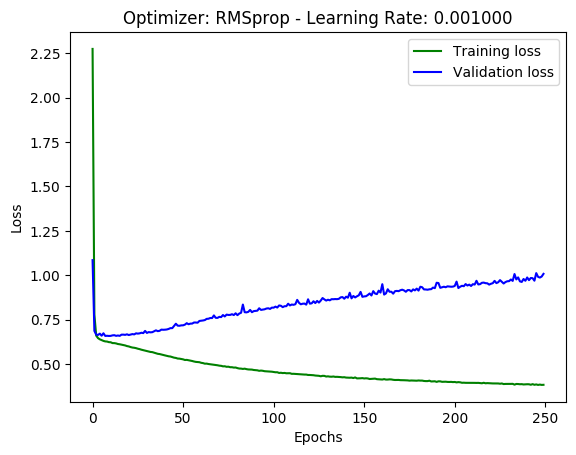

The training accuracyis: 0.7836076617240906
The training loss is: 0.47031291473059006
The test sccuracy is: 0.6109589041095891
Train RMSE: 0.69 RMSE
Test RMSE: 0.95 RMSE

2916/2916 [==============================] - 0s 15us/sample - loss: 0.6140 - accuracy: 0.8162


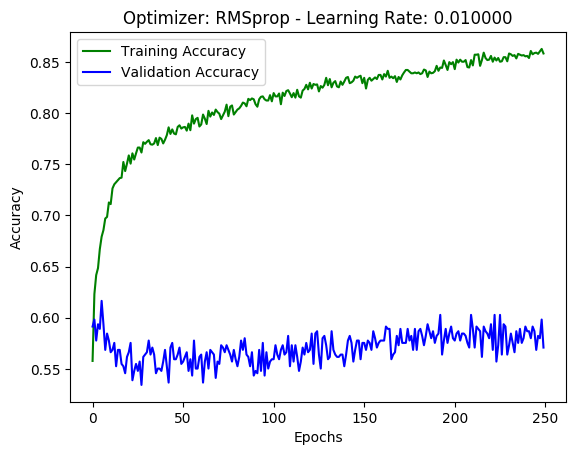

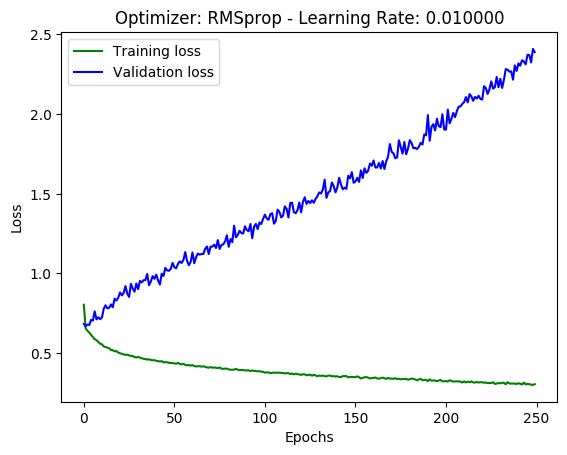

The training accuracyis: 0.8161865472793579
The training loss is: 0.6139551931774992
The test sccuracy is: 0.589041095890411
Train RMSE: 0.78 RMSE
Test RMSE: 1.46 RMSE

2916/2916 [==============================] - 0s 17us/sample - loss: 0.8983 - accuracy: 0.5816


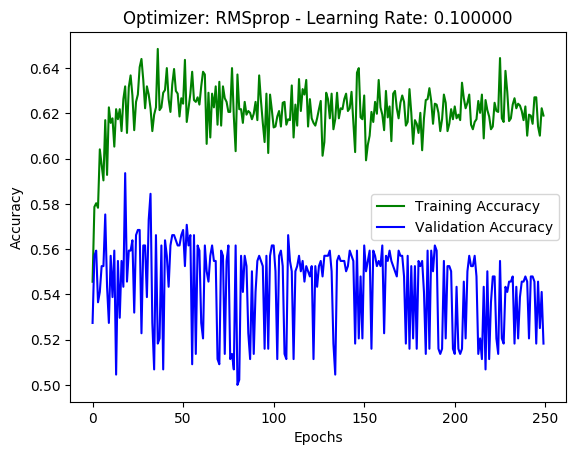

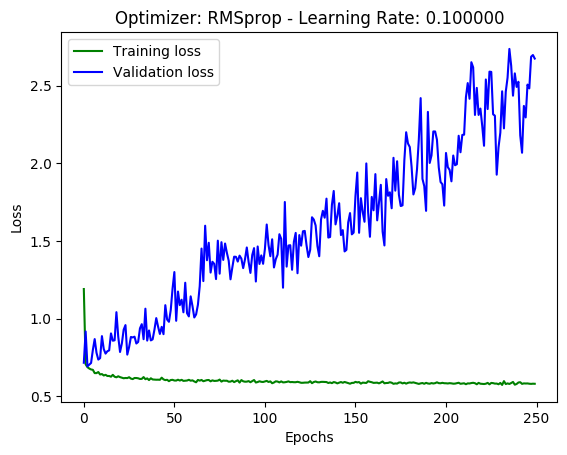

The training accuracyis: 0.5816186666488647
The training loss is: 0.8983349072426271
The test sccuracy is: 0.5342465753424658
Train RMSE: 0.95 RMSE
Test RMSE: 1.60 RMSE

2916/2916 [==============================] - 0s 18us/sample - loss: 0.9441 - accuracy: 0.4431


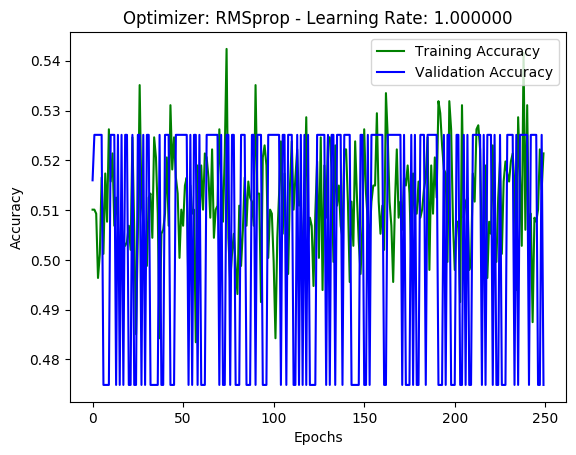

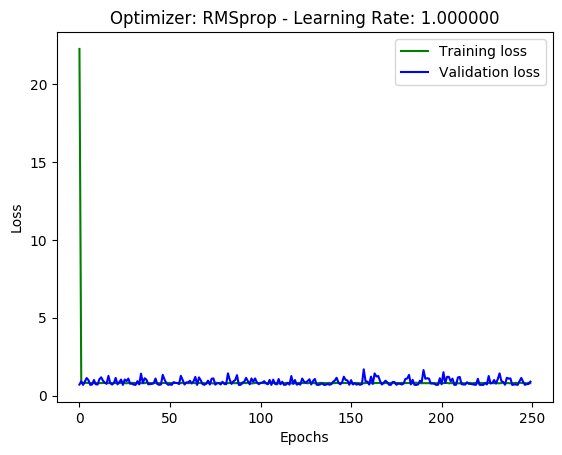

The training accuracyis: 0.44307270646095276
The training loss is: 0.9440839037156072
The test sccuracy is: 0.4726027397260274
Train RMSE: 0.97 RMSE
Test RMSE: 0.95 RMSE

2916/2916 [==============================] - 0s 16us/sample - loss: 2.9903 - accuracy: 0.4626


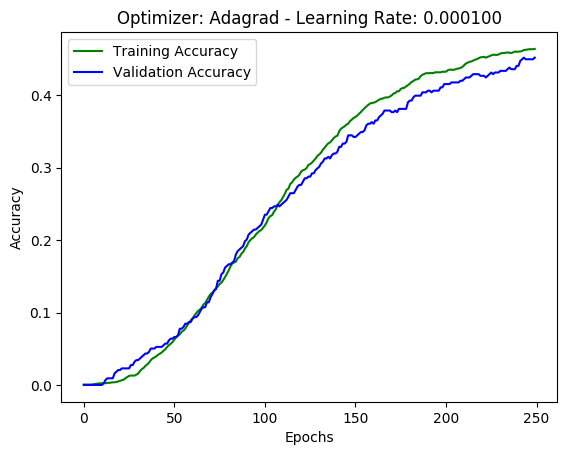

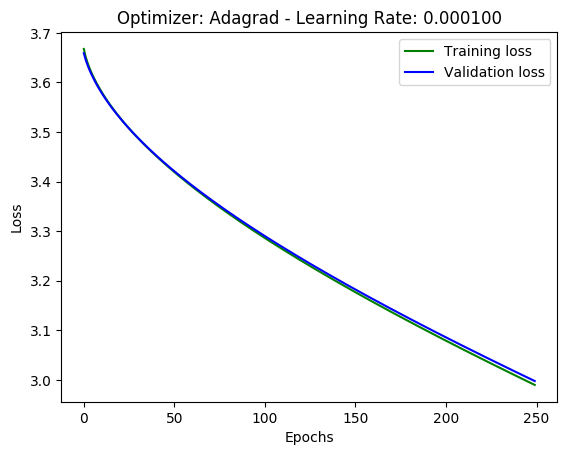

The training accuracyis: 0.4626200199127197
The training loss is: 2.990339120883183
The test sccuracy is: 0.4643835616438356
Train RMSE: 1.73 RMSE
Test RMSE: 1.73 RMSE

2916/2916 [==============================] - 0s 18us/sample - loss: 0.6775 - accuracy: 0.6049


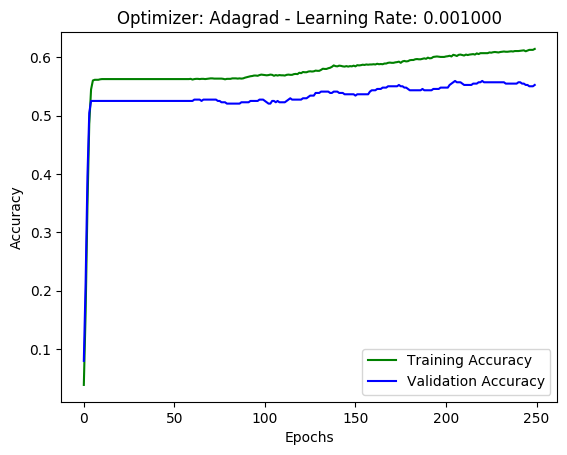

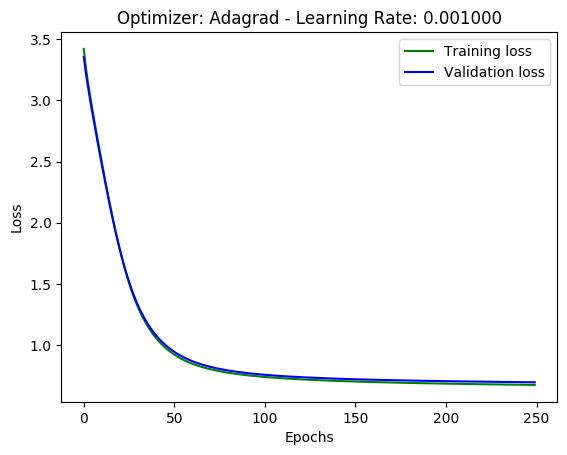

The training accuracyis: 0.604938268661499
The training loss is: 0.6775222428459853
The test sccuracy is: 0.547945205479452
Train RMSE: 0.82 RMSE
Test RMSE: 0.83 RMSE

2916/2916 [==============================] - 0s 28us/sample - loss: 0.5806 - accuracy: 0.6996


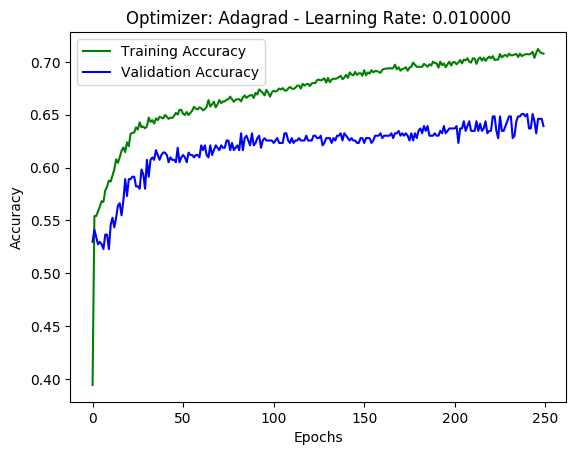

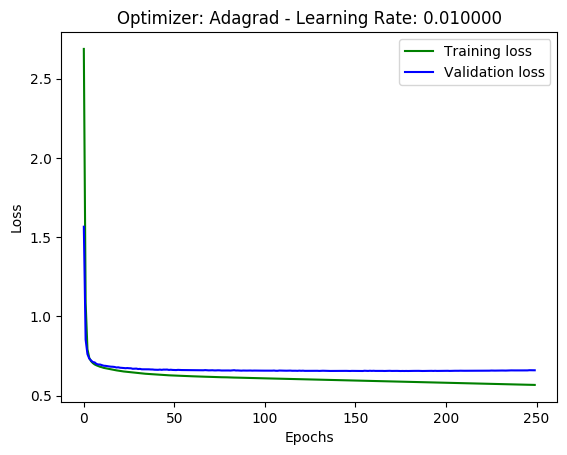

The training accuracyis: 0.6995884776115417
The training loss is: 0.5805685375861834
The test sccuracy is: 0.5863013698630137
Train RMSE: 0.76 RMSE
Test RMSE: 0.82 RMSE

2916/2916 [==============================] - 0s 21us/sample - loss: 0.4412 - accuracy: 0.8165


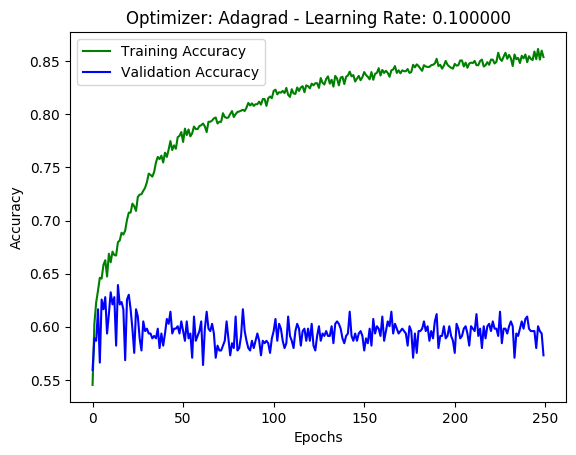

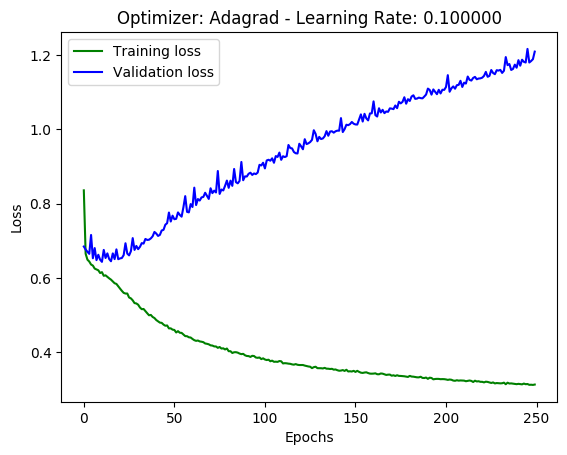

The training accuracyis: 0.8165295124053955
The training loss is: 0.4411646151411844
The test sccuracy is: 0.6150684931506849
Train RMSE: 0.66 RMSE
Test RMSE: 1.04 RMSE

2916/2916 [==============================] - 0s 19us/sample - loss: 0.5676 - accuracy: 0.7099


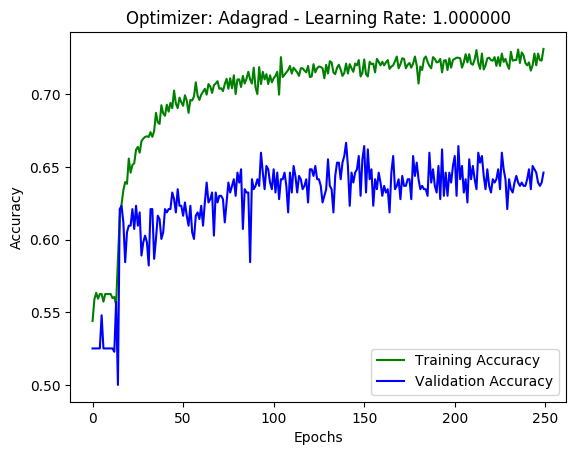

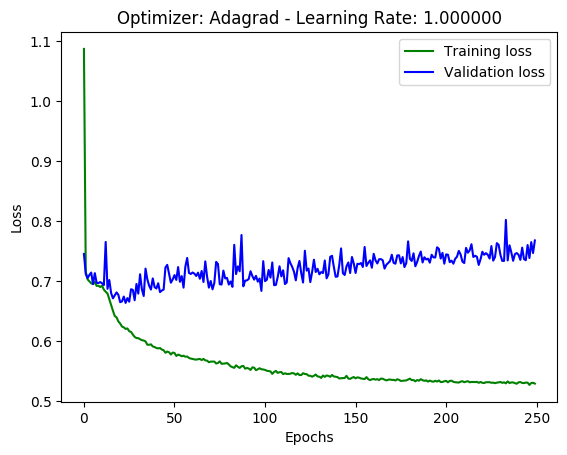

The training accuracyis: 0.709876537322998
The training loss is: 0.5676392809026689
The test sccuracy is: 0.6164383561643836
Train RMSE: 0.75 RMSE
Test RMSE: 0.89 RMSE

2916/2916 [==============================] - 0s 18us/sample - loss: 0.6217 - accuracy: 0.6553


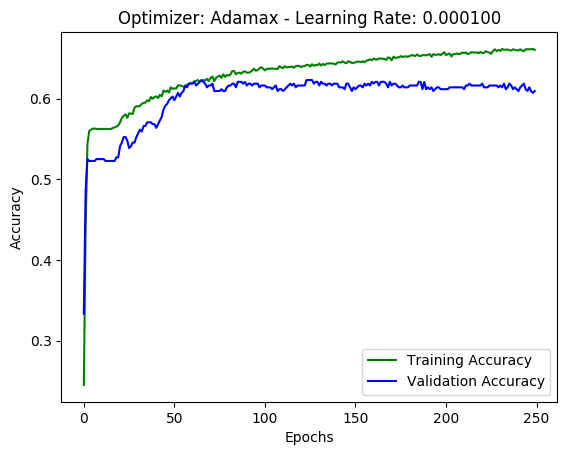

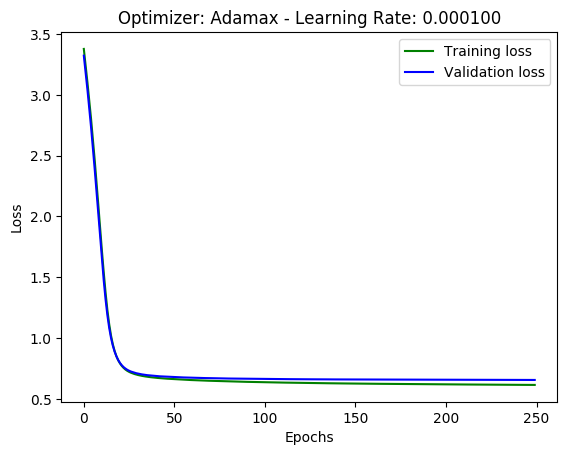

The training accuracyis: 0.6553497910499573
The training loss is: 0.6217237670071658
The test sccuracy is: 0.5917808219178082
Train RMSE: 0.79 RMSE
Test RMSE: 0.81 RMSE

2916/2916 [==============================] - 0s 17us/sample - loss: 0.4963 - accuracy: 0.7606


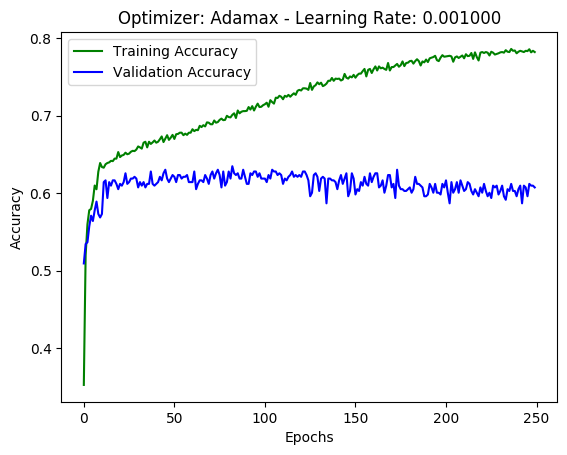

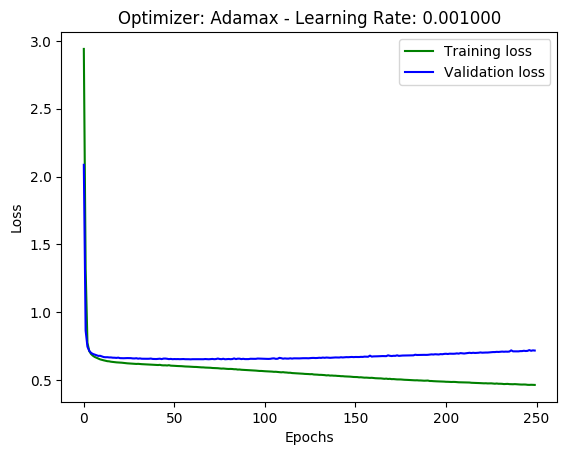

The training accuracyis: 0.7606310248374939
The training loss is: 0.49626081650476234
The test sccuracy is: 0.6246575342465753
Train RMSE: 0.70 RMSE
Test RMSE: 0.84 RMSE

2916/2916 [==============================] - 0s 17us/sample - loss: 0.4607 - accuracy: 0.8333


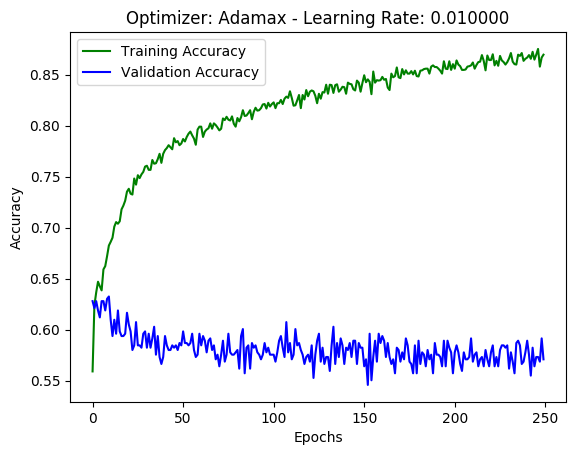

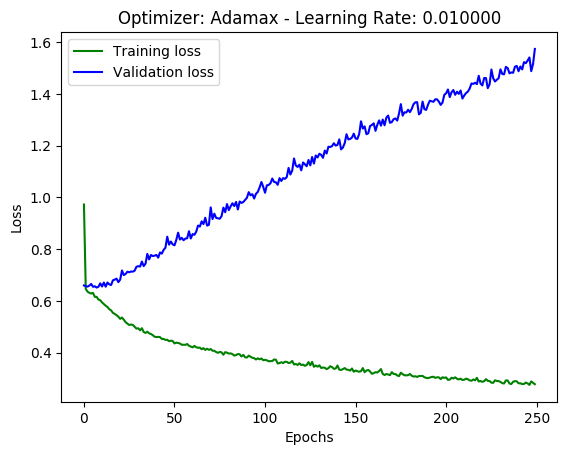

The training accuracyis: 0.8333333134651184
The training loss is: 0.46073285599631375
The test sccuracy is: 0.589041095890411
Train RMSE: 0.68 RMSE
Test RMSE: 1.22 RMSE

2916/2916 [==============================] - 0s 22us/sample - loss: 0.6139 - accuracy: 0.8165


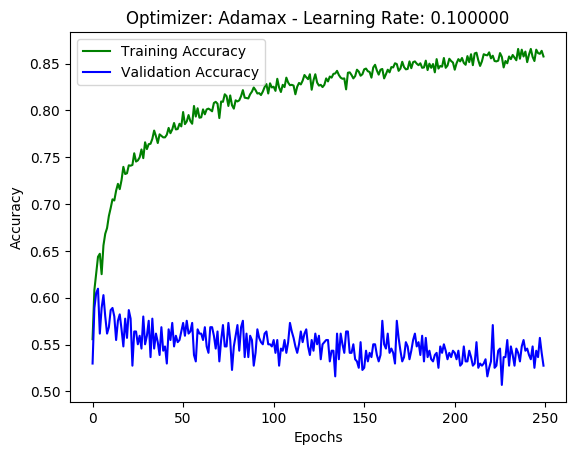

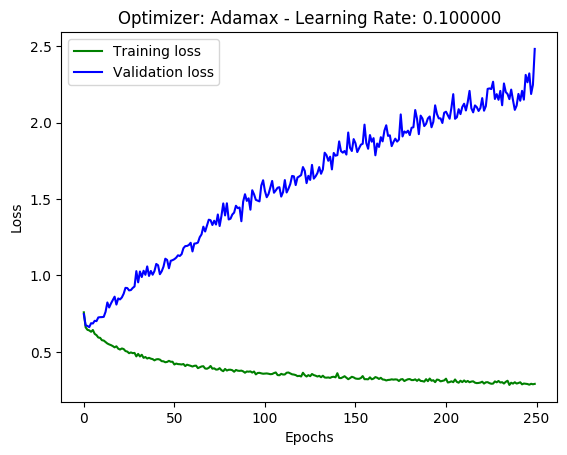

The training accuracyis: 0.8165295124053955
The training loss is: 0.6138933955069595
The test sccuracy is: 0.5835616438356165
Train RMSE: 0.78 RMSE
Test RMSE: 1.39 RMSE

2916/2916 [==============================] - 0s 22us/sample - loss: 0.6867 - accuracy: 0.5569


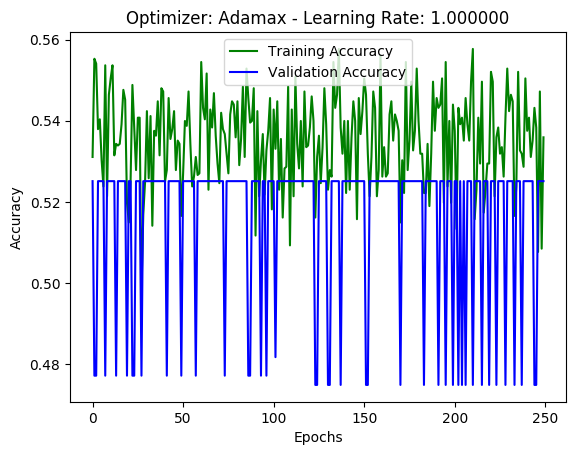

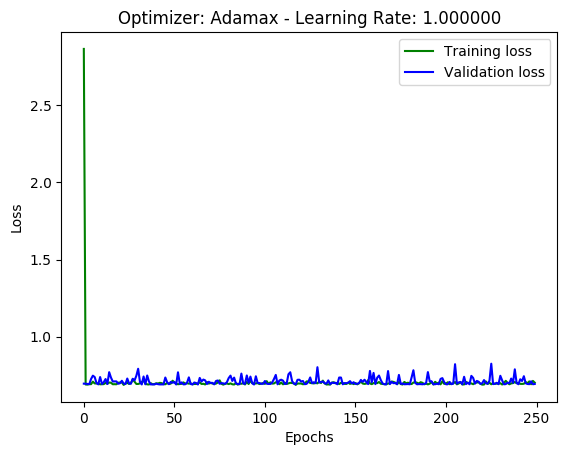

The training accuracyis: 0.5569273233413696
The training loss is: 0.6866517008904404
The test sccuracy is: 0.5273972602739726
Train RMSE: 0.83 RMSE
Test RMSE: 0.83 RMSE

2916/2916 [==============================] - 0s 23us/sample - loss: 0.5870 - accuracy: 0.6927


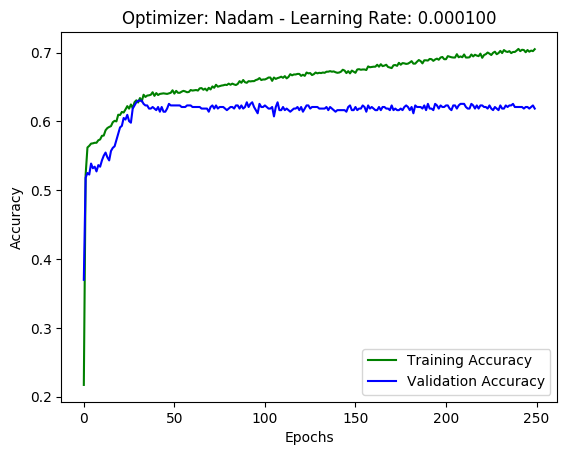

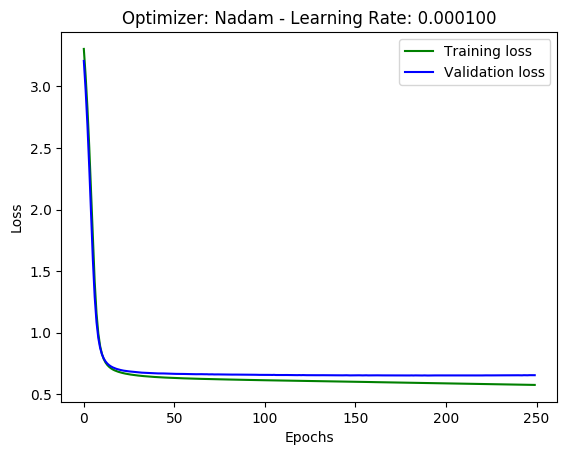

The training accuracyis: 0.6927297711372375
The training loss is: 0.5870302233676361
The test sccuracy is: 0.6164383561643836
Train RMSE: 0.77 RMSE
Test RMSE: 0.81 RMSE

2916/2916 [==============================] - 0s 17us/sample - loss: 0.4604 - accuracy: 0.8038


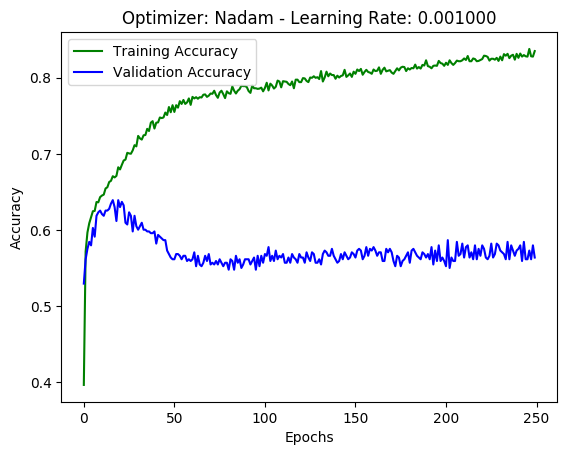

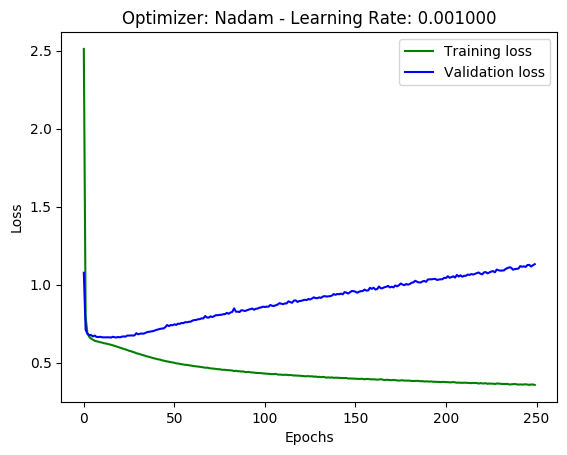

The training accuracyis: 0.8038408756256104
The training loss is: 0.46036607116992256
The test sccuracy is: 0.5972602739726027
Train RMSE: 0.68 RMSE
Test RMSE: 1.03 RMSE

2916/2916 [==============================] - 0s 21us/sample - loss: 0.5849 - accuracy: 0.8381


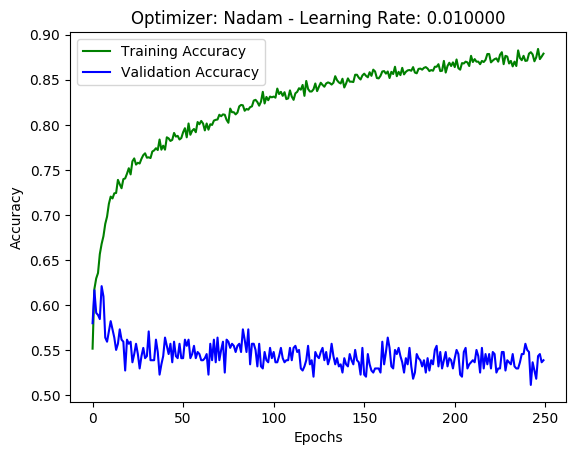

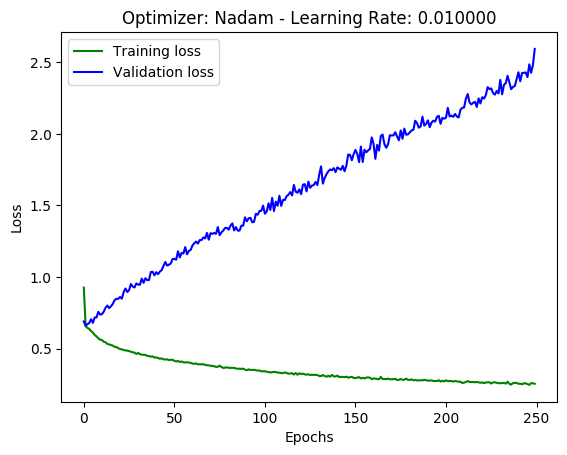

The training accuracyis: 0.8381344079971313
The training loss is: 0.584912088836335
The test sccuracy is: 0.6041095890410959
Train RMSE: 0.76 RMSE
Test RMSE: 1.48 RMSE

2916/2916 [==============================] - 0s 17us/sample - loss: 0.8369 - accuracy: 0.7075


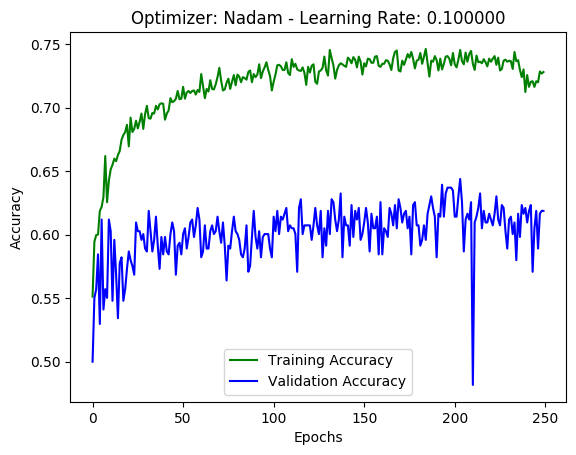

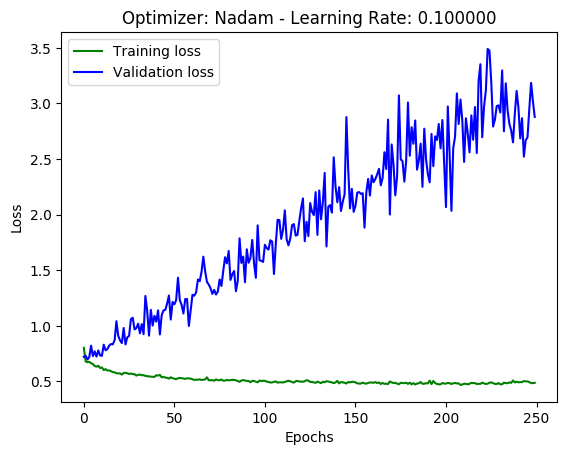

The training accuracyis: 0.707476019859314
The training loss is: 0.8369302413591142
The test sccuracy is: 0.6054794520547945
Train RMSE: 0.91 RMSE
Test RMSE: 1.70 RMSE

2916/2916 [==============================] - 0s 17us/sample - loss: 0.8179 - accuracy: 0.4431


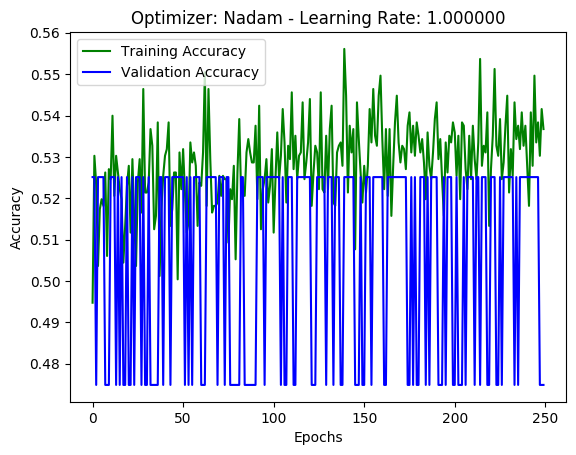

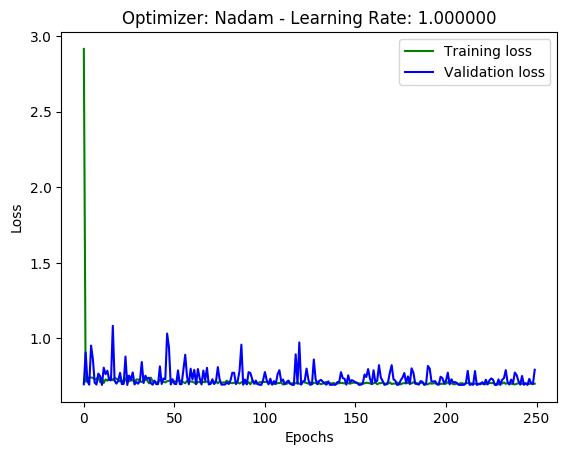

The training accuracyis: 0.44307270646095276
The training loss is: 0.8179321980770723
The test sccuracy is: 0.4726027397260274
Train RMSE: 0.90 RMSE
Test RMSE: 0.89 RMSE

2916/2916 [==============================] - 0s 18us/sample - loss: 3.4038 - accuracy: 0.5569


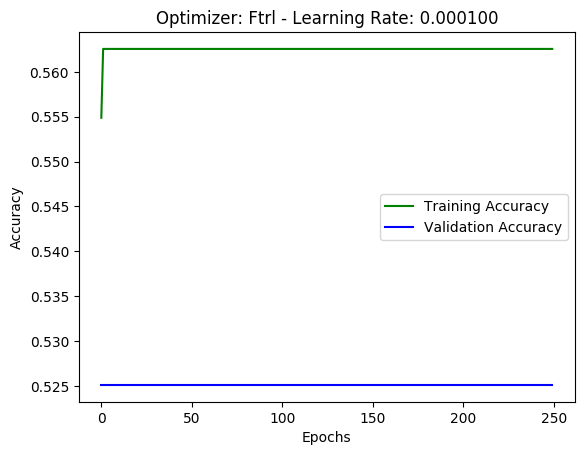

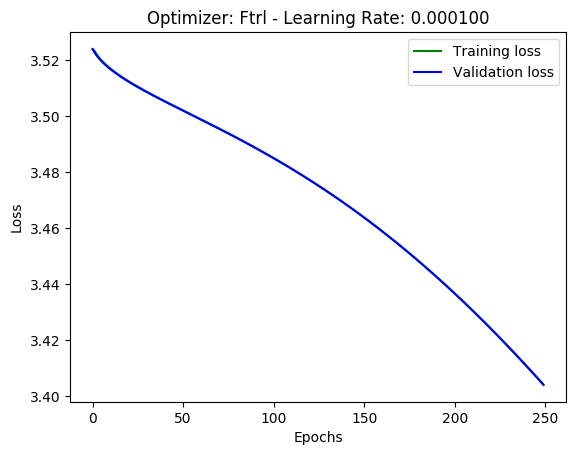

The training accuracyis: 0.5569273233413696
The training loss is: 3.403808208813556
The test sccuracy is: 0.5273972602739726
Train RMSE: 1.84 RMSE
Test RMSE: 1.85 RMSE

2916/2916 [==============================] - 0s 17us/sample - loss: 0.7103 - accuracy: 0.5569


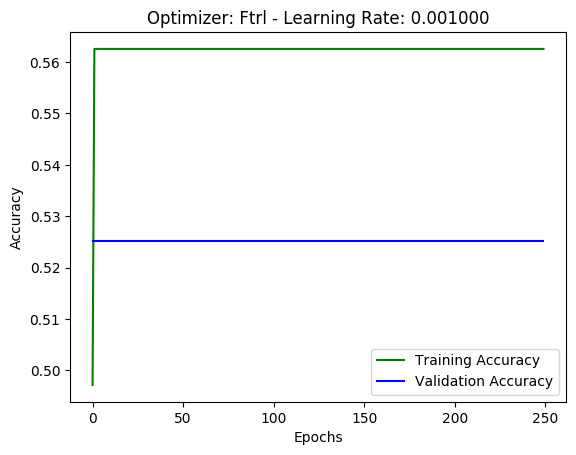

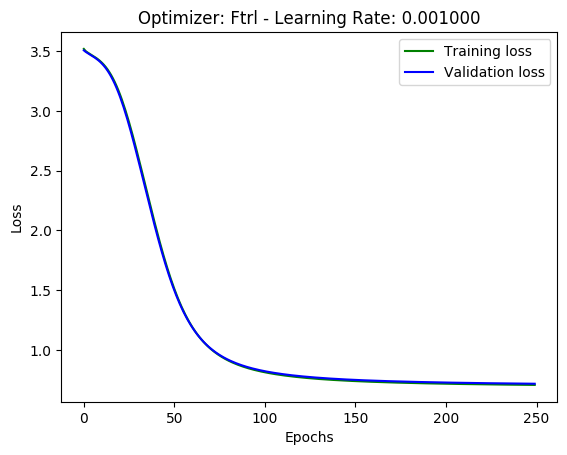

The training accuracyis: 0.5569273233413696
The training loss is: 0.7102720588650069
The test sccuracy is: 0.5273972602739726
Train RMSE: 0.84 RMSE
Test RMSE: 0.85 RMSE

2916/2916 [==============================] - 0s 24us/sample - loss: 0.6264 - accuracy: 0.6509


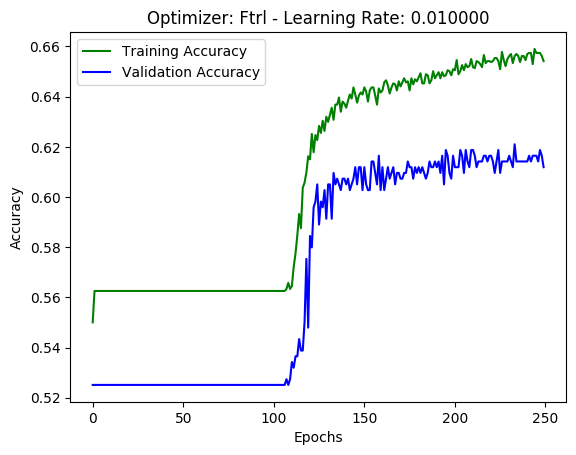

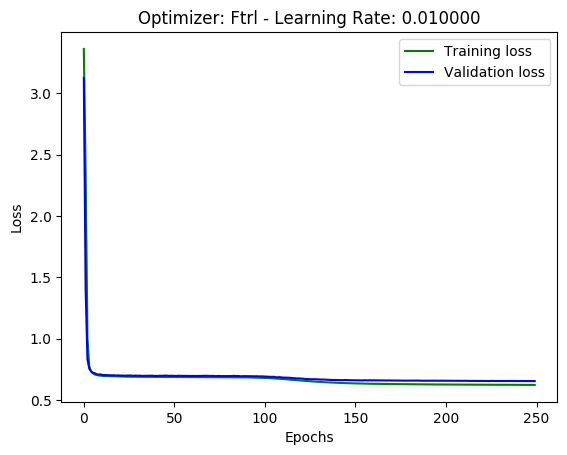

The training accuracyis: 0.6508916616439819
The training loss is: 0.6264463549042926
The test sccuracy is: 0.5931506849315068
Train RMSE: 0.79 RMSE
Test RMSE: 0.81 RMSE

2916/2916 [==============================] - 0s 22us/sample - loss: 0.4966 - accuracy: 0.7593


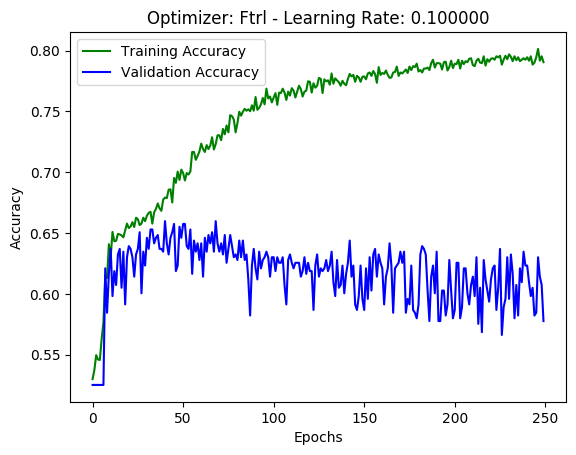

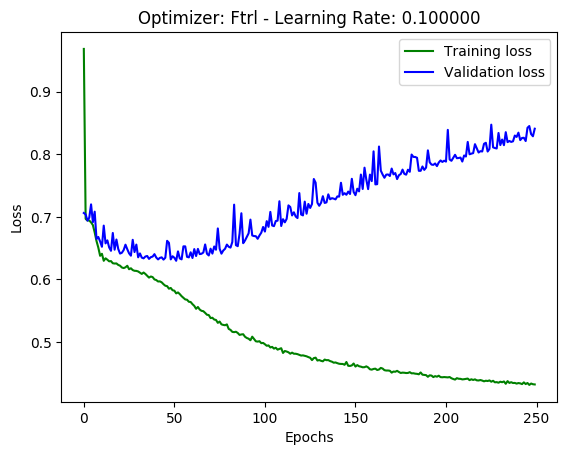

The training accuracyis: 0.7592592835426331
The training loss is: 0.4965707608211188
The test sccuracy is: 0.6219178082191781
Train RMSE: 0.70 RMSE
Test RMSE: 0.89 RMSE

2916/2916 [==============================] - 0s 17us/sample - loss: 0.5953 - accuracy: 0.6742


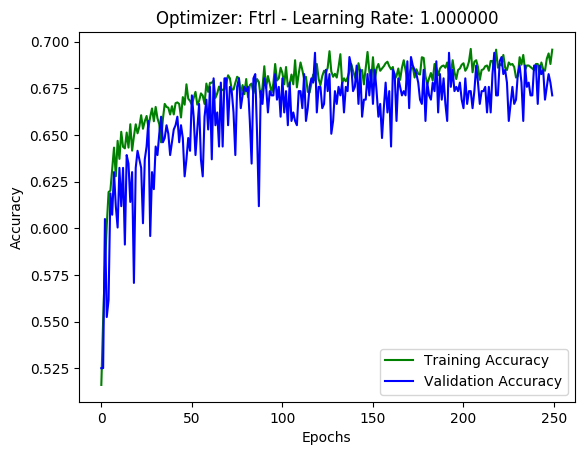

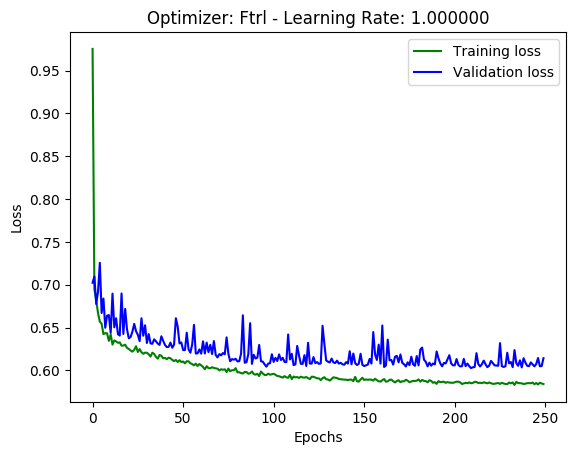

The training accuracyis: 0.6742112636566162
The training loss is: 0.5952830454449595
The test sccuracy is: 0.663013698630137
Train RMSE: 0.77 RMSE
Test RMSE: 0.78 RMSE



In [103]:
# List of optimizers and learning rates to be looped through
list_optimizers = ['Adam', 'SGD', 'Adadelta', 'RMSprop', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]

# Number of epochs per model
nn_epochs = 250

# Validation Split
val_split = 0.15

# Initializing a DataFrame to save each model results
nn_results = pd.DataFrame()

# Loop
for opt in list_optimizers:
    for lr in learning_rates:
        
        # Building a multilayer neural network using Keras
        model = Sequential()
        model.add(Dense(68, input_dim = dims, activation = 'relu'))
        model.add(Dense(34, activation = 'softmax'))
        
        # Compile the model to provide the training parameters
        model.compile(optimizer = select_optimizer(opt, lr), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
        
        # Train the model
        nn_history = model.fit(X_train, y_train, epochs = nn_epochs, verbose = 0, validation_split = val_split)
        
        # Evaluate the trained model
        nn_eval = model.evaluate(X_train, y_train)
        
        # Preicting using the testing data
        y_test_pred = model.predict_classes(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # New row for results dataframe containing model hyperparameters and results
        new_row = {'epochs': nn_epochs,
                   'validation_split': val_split,
                   'training accuracy': nn_eval[1],
                   'training loss': nn_eval[0],
                   'testing accuracy': test_accuracy,
                   'optimizer': str(opt),
                   'learning_rate': lr
                   }
        nn_results = nn_results.append(new_row, ignore_index = True)
        
        # Plot Accuracy
        loss_train = nn_history.history['accuracy']
        loss_val = nn_history.history['val_accuracy']
        epochs = range(0, nn_epochs)
        plt.plot(epochs, loss_train, 'g', label = 'Training Accuracy')
        plt.plot(epochs, loss_val, 'b', label = 'Validation Accuracy')
        plt.title("Optimizer: %s - Learning Rate: %f" % (opt, lr))
        #plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        
        # Plot Loss
        loss_train = nn_history.history['loss']
        loss_val = nn_history.history['val_loss']
        epochs = range(0, nn_epochs)
        plt.plot(epochs, loss_train, 'g', label = 'Training loss')
        plt.plot(epochs, loss_val, 'b', label = 'Validation loss')
        plt.title("Optimizer: %s - Learning Rate: %f" % (opt, lr))
        #plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Evaluate the trained model
        print(f"The training accuracyis: {nn_eval[1]}")
        print(f"The training loss is: {nn_eval[0]}")
        print(f"The test sccuracy is: {test_accuracy}")
        get_rmse(model)
        print()

In [104]:
nn_results = nn_results.sort_values(by = 'testing accuracy', ascending = False)
nn_results.head(50)

epochs  learning_rate optimizer  testing accuracy  training accuracy  training loss  validation_split
39   250.0         1.0000      Ftrl          0.663014           0.674211       0.595283              0.15
7    250.0         0.0100       SGD          0.631507           0.672497       0.605005              0.15
26   250.0         0.0010    Adamax          0.624658           0.760631       0.496261              0.15
38   250.0         0.1000      Ftrl          0.621918           0.759259       0.496571              0.15
15   250.0         0.0001   RMSprop          0.621918           0.671468       0.602560              0.15
30   250.0         0.0001     Nadam          0.616438           0.692730       0.587030              0.15
24   250.0         1.0000   Adagrad          0.616438           0.709877       0.567639              0.15
14   250.0         1.0000  Adadelta          0.615068           0.764746       0.490319              0.15
23   250.0         0.1000   Adagrad          0.615068           0.816530       0.441165              0.15
1    250.0         0.0010      Adam          0.613699           0.789780       0.456144              0.15
0    250.0         0.0001      Adam          0.613699           0.690672       0.582680              0.15
16   250.0         0.0010   RMSprop          0.610959           0.783608       0.470313              0.15
3    250.0         0.1000      Adam          0.609589           0.686557       0.960909              0.15
33   250.0         0.1000     Nadam          0.605479           0.707476       0.836930              0.15
32   250.0         0.0100     Nadam          0.604110           0.838134       0.584912              0.15
13   250.0         0.1000  Adadelta          0.600000           0.680384       0.593917              0.15
31   250.0         0.0010     Nadam          0.597260           0.803841       0.460366              0.15
37   250.0         0.0100      Ftrl          0.593151           0.650892       0.626446              0.15
25   250.0         0.0001    Adamax          0.591781           0.655350       0.621724              0.15
27   250.0         0.0100    Adamax          0.589041           0.833333       0.460733              0.15
17   250.0         0.0100   RMSprop          0.589041           0.816187       0.613955              0.15
22   250.0         0.0100   Adagrad          0.586301           0.699588       0.580569              0.15
28   250.0         0.1000    Adamax          0.583562           0.816530       0.613893              0.15
2    250.0         0.0100      Adam          0.575342           0.836763       0.542303              0.15
9    250.0         1.0000       SGD          0.573973           0.820302       0.550319              0.15
8    250.0         0.1000       SGD          0.568493           0.704390       0.624831              0.15
6    250.0         0.0010       SGD          0.567123           0.597394       0.666206              0.15
12   250.0         0.0100  Adadelta          0.553425           0.623800       0.652992              0.15
21   250.0         0.0010   Adagrad          0.547945           0.604938       0.677522              0.15
18   250.0         0.1000   RMSprop          0.534247           0.581619       0.898335              0.15
35   250.0         0.0001      Ftrl          0.527397           0.556927       3.403808              0.15
36   250.0         0.0010      Ftrl          0.527397           0.556927       0.710272              0.15
29   250.0         1.0000    Adamax          0.527397           0.556927       0.686652              0.15
5    250.0         0.0001       SGD          0.526027           0.557613       0.869986              0.15
11   250.0         0.0010  Adadelta          0.515068           0.556927       1.210409              0.15
34   250.0         1.0000     Nadam          0.472603           0.443073       0.817932              0.15
4    250.0         1.0000      Adam          0.472603           0.443073       0.7